# Description

In the given dataset which consist of weather forecast information data obtained from LDAPS model operated by Korea Meteorological Administration over Seoul, South Korea. It has summer data for the year 2013 to 2017.

For input features, we have various atmospheric variables available like in-site Maximum and Minimum temperature of present day and other geographical auxillary variables. Datset also contains Next Day Maximum and Next day Minimum temperatures.

Attribute Information:

1. station - used weather station number: 1 to 25
2. Date - Present day: yyyy-mm-dd ('2013-06-30' to '2017-08-30')
3. Present_Tmax - Maximum air temperature between 0 and 21 h on the present day (Â°C): 20 to 37.6
4. Present_Tmin - Minimum air temperature between 0 and 21 h on the present day (Â°C): 11.3 to 29.9
5. LDAPS_RHmin - LDAPS model forecast of next-day minimum relative humidity (%): 19.8 to 98.5
6. LDAPS_RHmax - LDAPS model forecast of next-day maximum relative humidity (%): 58.9 to 100
7. LDAPS_Tmax_lapse - LDAPS model forecast of next-day maximum air temperature applied lapse rate (Â°C): 17.6 to 38.5
8. LDAPS_Tmin_lapse - LDAPS model forecast of next-day minimum air temperature applied lapse rate (Â°C): 14.3 to 29.6
9. LDAPS_WS - LDAPS model forecast of next-day average wind speed (m/s): 2.9 to 21.9
10. LDAPS_LH - LDAPS model forecast of next-day average latent heat flux (W/m2): -13.6 to 213.4
11. LDAPS_CC1 - LDAPS model forecast of next-day 1st 6-hour split average cloud cover (0-5 h) (%): 0 to 0.97
12. LDAPS_CC2 - LDAPS model forecast of next-day 2nd 6-hour split average cloud cover (6-11 h) (%): 0 to 0.97
13. LDAPS_CC3 - LDAPS model forecast of next-day 3rd 6-hour split average cloud cover (12-17 h) (%): 0 to 0.98
14. LDAPS_CC4 - LDAPS model forecast of next-day 4th 6-hour split average cloud cover (18-23 h) (%): 0 to 0.97
15. LDAPS_PPT1 - LDAPS model forecast of next-day 1st 6-hour split average precipitation (0-5 h) (%): 0 to 23.7
16. LDAPS_PPT2 - LDAPS model forecast of next-day 2nd 6-hour split average precipitation (6-11 h) (%): 0 to 21.6
17. LDAPS_PPT3 - LDAPS model forecast of next-day 3rd 6-hour split average precipitation (12-17 h) (%): 0 to 15.8
18. LDAPS_PPT4 - LDAPS model forecast of next-day 4th 6-hour split average precipitation (18-23 h) (%): 0 to 16.7
19. lat - Latitude (Â°): 37.456 to 37.645
20. lon - Longitude (Â°): 126.826 to 127.135
21. DEM - Elevation (m): 12.4 to 212.3
22. Slope - Slope (Â°): 0.1 to 5.2
23. Solar radiation - Daily incoming solar radiation (wh/m2): 4329.5 to 5992.9
24. Next_Tmax - The next-day maximum air temperature (Â°C): 17.4 to 38.9
25. Next_Tmin - The next-day minimum air temperature (Â°C): 11.3 to 29.8T

We havce to build a machine learning model which on the basis atmospheric variables can predict Next Day Maximum and Next Day Minimum temperature. As we have two target variables and are continuous in nature, we will move ahead with regression approach.

Lets Begin....!!!!

In [1]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [80]:
# Importing dataset into a dataframe

temp=pd.read_csv('temperature.csv')

In [3]:
pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)

# Overview of Dataset

In [5]:
temp.head(10)

station        Date  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
0      1.0  30-06-2013          28.7          21.4    58.255688    91.116364   
1      2.0  30-06-2013          31.9          21.6    52.263397    90.604721   
2      3.0  30-06-2013          31.6          23.3    48.690479    83.973587   
3      4.0  30-06-2013          32.0          23.4    58.239788    96.483688   
4      5.0  30-06-2013          31.4          21.9    56.174095    90.155128   
5      6.0  30-06-2013          31.9          23.5    52.437126    85.307251   
6      7.0  30-06-2013          31.4          24.4    56.287189    81.019760   
7      8.0  30-06-2013          32.1          23.6    52.326218    78.004539   
8      9.0  30-06-2013          31.4          22.0    55.338791    80.784607   
9     10.0  30-06-2013          31.6          20.5    56.651203    86.849632   

   LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS    LDAPS_LH  LDAPS_CC1  \
0         28.074101         23.006936  6.818887   69.451805   0.233947   
1         29.850689         24.035009  5.691890   51.937448   0.225508   
2         30.091292         24.565633  6.138224   20.573050   0.209344   
3         29.704629         23.326177  5.650050   65.727144   0.216372   
4         29.113934         23.486480  5.735004  107.965535   0.151407   
5         29.219342         23.822613  6.182295   50.231389   0.185279   
6         28.551859         24.238467  5.587135  125.110007   0.389600   
7         28.851982         23.819054  6.104417   42.011547   0.357856   
8         28.426975         23.332373  6.017135   85.110971   0.408766   
9         27.576705         22.527018  6.518841   63.006075   0.348292   

   LDAPS_CC2  LDAPS_CC3  LDAPS_CC4  LDAPS_PPT1  LDAPS_PPT2  LDAPS_PPT3  \
0   0.203896   0.161697   0.130928         0.0         0.0         0.0   
1   0.251771   0.159444   0.127727         0.0         0.0         0.0   
2   0.257469   0.204091   0.142125         0.0         0.0         0.0   
3   0.226002   0.161157   0.134249         0.0         0.0         0.0   
4   0.249995   0.178892   0.170021         0.0         0.0         0.0   
5   0.280818   0.232841   0.146363         0.0         0.0         0.0   
6   0.333570   0.270419   0.145705         0.0         0.0         0.0   
7   0.344928   0.272387   0.143841         0.0         0.0         0.0   
8   0.344800   0.264980   0.148911         0.0         0.0         0.0   
9   0.306255   0.245254   0.135443         0.0         0.0         0.0   

   LDAPS_PPT4      lat      lon       DEM   Slope  Solar radiation  Next_Tmax  \
0         0.0  37.6046  126.991  212.3350  2.7850      5992.895996       29.1   
1         0.0  37.6046  127.032   44.7624  0.5141      5869.312500       30.5   
2         0.0  37.5776  127.058   33.3068  0.2661      5863.555664       31.1   
3         0.0  37.6450  127.022   45.7160  2.5348      5856.964844       31.7   
4         0.0  37.5507  127.135   35.0380  0.5055      5859.552246       31.2   
5         0.0  37.5102  127.042   54.6384  0.1457      5873.780762       31.5   
6         0.0  37.5776  126.838   12.3700  0.0985      5849.233398       30.9   
7         0.0  37.4697  126.910   52.5180  1.5629      5863.992188       31.1   
8         0.0  37.4967  126.826   50.9312  0.4125      5876.901367       31.3   
9         0.0  37.4562  126.955  208.5070  5.1782      5893.608398       30.5   

   Next_Tmin  
0       21.2  
1       22.5  
2       23.9  
3       24.3  
4       22.5  
5       24.0  
6       23.4  
7       22.9  
8       21.6  
9       21.0

In [6]:
temp.tail(10)

station        Date  Present_Tmax  Present_Tmin  LDAPS_RHmin  \
7742     18.0  30-08-2017          23.3          18.2    30.259682   
7743     19.0  30-08-2017          22.6          15.0    25.536045   
7744     20.0  30-08-2017          22.7          15.9    38.216373   
7745     21.0  30-08-2017          23.1          17.8    24.688997   
7746     22.0  30-08-2017          22.5          17.4    30.094858   
7747     23.0  30-08-2017          23.3          17.1    26.741310   
7748     24.0  30-08-2017          23.3          17.7    24.040634   
7749     25.0  30-08-2017          23.2          17.4    22.933014   
7750      NaN         NaN          20.0          11.3    19.794666   
7751      NaN         NaN          37.6          29.9    98.524734   

      LDAPS_RHmax  LDAPS_Tmax_lapse  LDAPS_Tmin_lapse   LDAPS_WS    LDAPS_LH  \
7742    86.565193         26.474403         17.289157   6.522731   94.203783   
7743    78.779045         26.596280         17.856040   6.905963   54.030075   
7744    94.428116         24.037222         15.772677   6.478060  112.580310   
7745    78.261383         27.812697         18.303014   6.603253    9.614074   
7746    83.690018         26.704905         17.814038   5.768083   82.146707   
7747    78.869858         26.352081         18.775678   6.148918   72.058294   
7748    77.294975         27.010193         18.733519   6.542819   47.241457   
7749    77.243744         27.939516         18.522965   7.289264    9.090034   
7750    58.936283         17.624954         14.272646   2.882580  -13.603212   
7751   100.000153         38.542255         29.619342  21.857621  213.414006   

      LDAPS_CC1  LDAPS_CC2     LDAPS_CC3  LDAPS_CC4  LDAPS_PPT1  LDAPS_PPT2  \
7742   0.045451   0.034340  0.000000e+00   0.014070    0.000000    0.000000   
7743   0.056634   0.076289  0.000000e+00   0.000000    0.000000    0.000000   
7744   0.038019   0.005380  0.000000e+00   0.000938    0.000000    0.000000   
7745   0.052902   0.030169  0.000000e+00   0.004380    0.000000    0.000000   
7746   0.066461   0.024518  5.850000e-07   0.017678    0.000000    0.000000   
7747   0.030034   0.081035  0.000000e+00   0.000000    0.000000    0.000000   
7748   0.035874   0.074962  0.000000e+00   0.000000    0.000000    0.000000   
7749   0.048954   0.059869  0.000000e+00   0.000796    0.000000    0.000000   
7750   0.000000   0.000000  0.000000e+00   0.000000    0.000000    0.000000   
7751   0.967277   0.968353  9.837888e-01   0.974710   23.701544   21.621661   

      LDAPS_PPT3  LDAPS_PPT4      lat      lon       DEM     Slope  \
7742    0.000000    0.000000  37.4832  127.024   56.4448  1.231300   
7743    0.000000    0.000000  37.5776  126.938   75.0924  1.767800   
7744    0.000000    0.000000  37.6181  127.004  146.5540  4.729600   
7745    0.000000    0.000000  37.5507  127.040   26.2980  0.572100   
7746    0.000000    0.000000  37.5102  127.086   21.9668  0.133200   
7747    0.000000    0.000000  37.5372  126.891   15.5876  0.155400   
7748    0.000000    0.000000  37.5237  126.909   17.2956  0.222300   
7749    0.000000    0.000000  37.5237  126.970   19.5844  0.271300   
7750    0.000000    0.000000  37.4562  126.826   12.3700  0.098475   
7751   15.841235   16.655469  37.6450  127.135  212.3350  5.178230   

      Solar radiation  Next_Tmax  Next_Tmin  
7742      4435.611816       27.8       16.7  
7743      4495.473633       27.1       16.6  
7744      4554.965332       26.7       16.3  
7745      4456.024414       27.6       17.7  
7746      4441.803711       28.0       17.1  
7747      4443.313965       28.3       18.1  
7748      4438.373535       28.6       18.8  
7749      4451.345215       27.8       17.4  
7750      4329.520508       17.4       11.3  
7751      5992.895996       38.9       29.8

In [7]:
temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7752 entries, 0 to 7751
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   station           7750 non-null   float64
 1   Date              7750 non-null   object 
 2   Present_Tmax      7682 non-null   float64
 3   Present_Tmin      7682 non-null   float64
 4   LDAPS_RHmin       7677 non-null   float64
 5   LDAPS_RHmax       7677 non-null   float64
 6   LDAPS_Tmax_lapse  7677 non-null   float64
 7   LDAPS_Tmin_lapse  7677 non-null   float64
 8   LDAPS_WS          7677 non-null   float64
 9   LDAPS_LH          7677 non-null   float64
 10  LDAPS_CC1         7677 non-null   float64
 11  LDAPS_CC2         7677 non-null   float64
 12  LDAPS_CC3         7677 non-null   float64
 13  LDAPS_CC4         7677 non-null   float64
 14  LDAPS_PPT1        7677 non-null   float64
 15  LDAPS_PPT2        7677 non-null   float64
 16  LDAPS_PPT3        7677 non-null   float64


In [16]:
temp.shape

(7752, 25)

In [8]:
temp.dtypes

station             float64
Date                 object
Present_Tmax        float64
Present_Tmin        float64
LDAPS_RHmin         float64
LDAPS_RHmax         float64
LDAPS_Tmax_lapse    float64
LDAPS_Tmin_lapse    float64
LDAPS_WS            float64
LDAPS_LH            float64
LDAPS_CC1           float64
LDAPS_CC2           float64
LDAPS_CC3           float64
LDAPS_CC4           float64
LDAPS_PPT1          float64
LDAPS_PPT2          float64
LDAPS_PPT3          float64
LDAPS_PPT4          float64
lat                 float64
lon                 float64
DEM                 float64
Slope               float64
Solar radiation     float64
Next_Tmax           float64
Next_Tmin           float64
dtype: object

# Checking Null Values

In [4]:
temp.isnull().mean()*100

station             0.025800
Date                0.025800
Present_Tmax        0.902993
Present_Tmin        0.902993
LDAPS_RHmin         0.967492
LDAPS_RHmax         0.967492
LDAPS_Tmax_lapse    0.967492
LDAPS_Tmin_lapse    0.967492
LDAPS_WS            0.967492
LDAPS_LH            0.967492
LDAPS_CC1           0.967492
LDAPS_CC2           0.967492
LDAPS_CC3           0.967492
LDAPS_CC4           0.967492
LDAPS_PPT1          0.967492
LDAPS_PPT2          0.967492
LDAPS_PPT3          0.967492
LDAPS_PPT4          0.967492
lat                 0.000000
lon                 0.000000
DEM                 0.000000
Slope               0.000000
Solar radiation     0.000000
Next_Tmax           0.348297
Next_Tmin           0.348297
dtype: float64

In [5]:
# Total Null value percentage
print((temp.isnull().sum().sum())/len(temp)*100)

16.09907120743034


# Data Analysis

In [6]:
temp.describe()

station  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
count  7750.000000   7682.000000   7682.000000  7677.000000  7677.000000   
mean     13.000000     29.768211     23.225059    56.759372    88.374804   
std       7.211568      2.969999      2.413961    14.668111     7.192004   
min       1.000000     20.000000     11.300000    19.794666    58.936283   
25%       7.000000     27.800000     21.700000    45.963543    84.222862   
50%      13.000000     29.900000     23.400000    55.039024    89.793480   
75%      19.000000     32.000000     24.900000    67.190056    93.743629   
max      25.000000     37.600000     29.900000    98.524734   100.000153   

       LDAPS_Tmax_lapse  LDAPS_Tmin_lapse     LDAPS_WS     LDAPS_LH  \
count       7677.000000       7677.000000  7677.000000  7677.000000   
mean          29.613447         23.512589     7.097875    62.505019   
std            2.947191          2.345347     2.183836    33.730589   
min           17.624954         14.272646     2.882580   -13.603212   
25%           27.673499         22.089739     5.678705    37.266753   
50%           29.703426         23.760199     6.547470    56.865482   
75%           31.710450         25.152909     8.032276    84.223616   
max           38.542255         29.619342    21.857621   213.414006   

         LDAPS_CC1    LDAPS_CC2    LDAPS_CC3    LDAPS_CC4   LDAPS_PPT1  \
count  7677.000000  7677.000000  7677.000000  7677.000000  7677.000000   
mean      0.368774     0.356080     0.318404     0.299191     0.591995   
std       0.262458     0.258061     0.250362     0.254348     1.945768   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.146654     0.140615     0.101388     0.081532     0.000000   
50%       0.315697     0.312421     0.262555     0.227664     0.000000   
75%       0.575489     0.558694     0.496703     0.499489     0.052525   
max       0.967277     0.968353     0.983789     0.974710    23.701544   

        LDAPS_PPT2   LDAPS_PPT3   LDAPS_PPT4          lat          lon  \
count  7677.000000  7677.000000  7677.000000  7752.000000  7752.000000   
mean      0.485003     0.278200     0.269407    37.544722   126.991397   
std       1.762807     1.161809     1.206214     0.050352     0.079435   
min       0.000000     0.000000     0.000000    37.456200   126.826000   
25%       0.000000     0.000000     0.000000    37.510200   126.937000   
50%       0.000000     0.000000     0.000000    37.550700   126.995000   
75%       0.018364     0.007896     0.000041    37.577600   127.042000   
max      21.621661    15.841235    16.655469    37.645000   127.135000   

               DEM        Slope  Solar radiation    Next_Tmax    Next_Tmin  
count  7752.000000  7752.000000      7752.000000  7725.000000  7725.000000  
mean     61.867972     1.257048      5341.502803    30.274887    22.932220  
std      54.279780     1.370444       429.158867     3.128010     2.487613  
min      12.370000     0.098475      4329.520508    17.400000    11.300000  
25%      28.700000     0.271300      4999.018555    28.200000    21.300000  
50%      45.716000     0.618000      5436.345215    30.500000    23.100000  
75%      59.832400     1.767800      5728.316406    32.600000    24.600000  
max     212.335000     5.178230      5992.895996    38.900000    29.800000

We see there are some columns where mean is greater than median. It shows skewness in those columns. We didn't see any values which could reflect extreme outliers.

Thus, we will replace NaN values with the mean of the column.

In [81]:
# Filling NaN wit Mean

for i in temp.columns:
    if temp[i].dtypes!='O':
        temp[i]=temp[i].fillna(temp[i].mean())

We will drop two rows in date column which have NaN values

In [82]:
temp=temp.dropna()

Further we will convert Date column to datetime type and extract Day, Month and Year for each entry in a separate column. 

In [83]:
# Importing Datetime & Converting Date column

import datetime

temp['Date']=pd.to_datetime(temp['Date'])

In [10]:
temp.dtypes

station                    float64
Date                datetime64[ns]
Present_Tmax               float64
Present_Tmin               float64
LDAPS_RHmin                float64
LDAPS_RHmax                float64
LDAPS_Tmax_lapse           float64
LDAPS_Tmin_lapse           float64
LDAPS_WS                   float64
LDAPS_LH                   float64
LDAPS_CC1                  float64
LDAPS_CC2                  float64
LDAPS_CC3                  float64
LDAPS_CC4                  float64
LDAPS_PPT1                 float64
LDAPS_PPT2                 float64
LDAPS_PPT3                 float64
LDAPS_PPT4                 float64
lat                        float64
lon                        float64
DEM                        float64
Slope                      float64
Solar radiation            float64
Next_Tmax                  float64
Next_Tmin                  float64
dtype: object

In [84]:
# Extracting values to new columns.

temp['Day']=temp.Date.dt.day.copy()
temp['Month']=temp.Date.dt.month.copy()
temp['Year']=temp.Date.dt.year.copy()

In [12]:
temp.head()

station       Date  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
0      1.0 2013-06-30          28.7          21.4    58.255688    91.116364   
1      2.0 2013-06-30          31.9          21.6    52.263397    90.604721   
2      3.0 2013-06-30          31.6          23.3    48.690479    83.973587   
3      4.0 2013-06-30          32.0          23.4    58.239788    96.483688   
4      5.0 2013-06-30          31.4          21.9    56.174095    90.155128   

   LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS    LDAPS_LH  LDAPS_CC1  \
0         28.074101         23.006936  6.818887   69.451805   0.233947   
1         29.850689         24.035009  5.691890   51.937448   0.225508   
2         30.091292         24.565633  6.138224   20.573050   0.209344   
3         29.704629         23.326177  5.650050   65.727144   0.216372   
4         29.113934         23.486480  5.735004  107.965535   0.151407   

   LDAPS_CC2  LDAPS_CC3  LDAPS_CC4  LDAPS_PPT1  LDAPS_PPT2  LDAPS_PPT3  \
0   0.203896   0.161697   0.130928         0.0         0.0         0.0   
1   0.251771   0.159444   0.127727         0.0         0.0         0.0   
2   0.257469   0.204091   0.142125         0.0         0.0         0.0   
3   0.226002   0.161157   0.134249         0.0         0.0         0.0   
4   0.249995   0.178892   0.170021         0.0         0.0         0.0   

   LDAPS_PPT4      lat      lon       DEM   Slope  Solar radiation  Next_Tmax  \
0         0.0  37.6046  126.991  212.3350  2.7850      5992.895996       29.1   
1         0.0  37.6046  127.032   44.7624  0.5141      5869.312500       30.5   
2         0.0  37.5776  127.058   33.3068  0.2661      5863.555664       31.1   
3         0.0  37.6450  127.022   45.7160  2.5348      5856.964844       31.7   
4         0.0  37.5507  127.135   35.0380  0.5055      5859.552246       31.2   

   Next_Tmin  Day  Month  Year  
0       21.2   30      6  2013  
1       22.5   30      6  2013  
2       23.9   30      6  2013  
3       24.3   30      6  2013  
4       22.5   30      6  2013

In [85]:
# Dropping Date Column

temp=temp.drop(['Date'],axis=1)

# Checking Distribution of Values

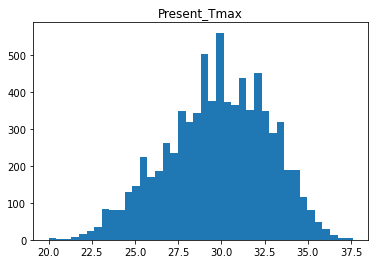

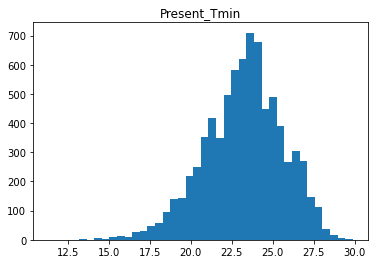

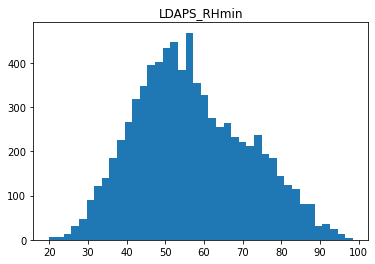

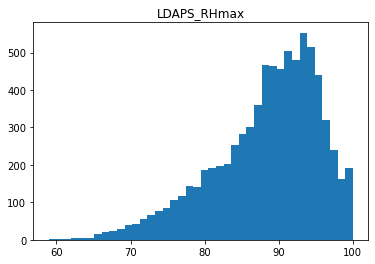

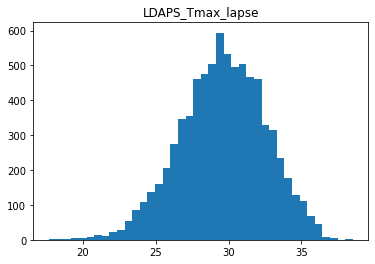

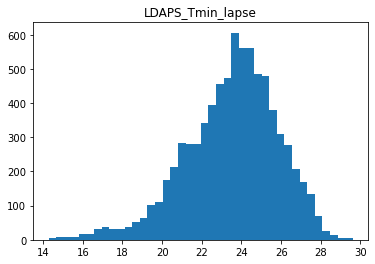

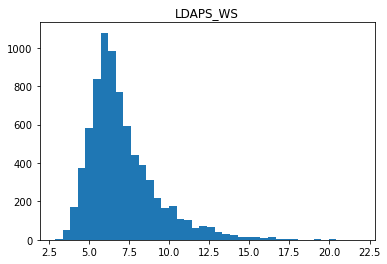

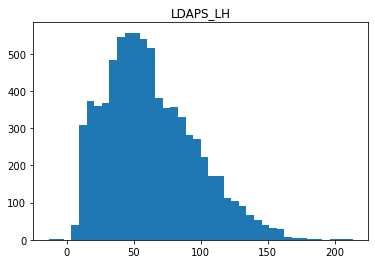

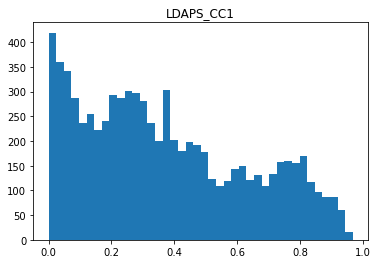

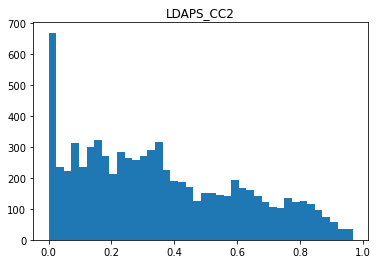

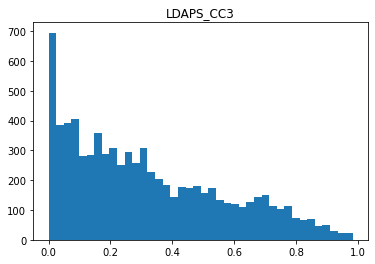

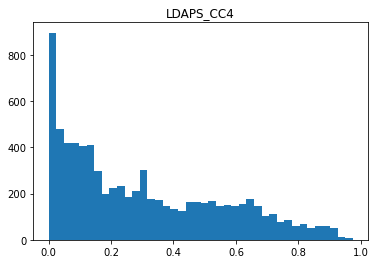

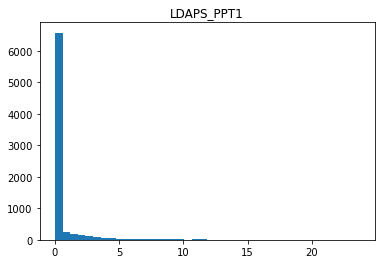

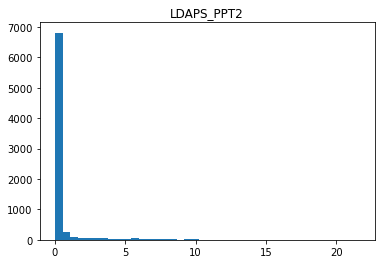

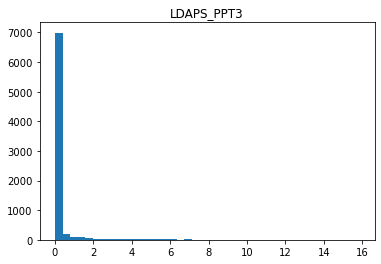

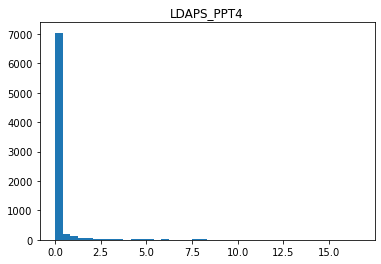

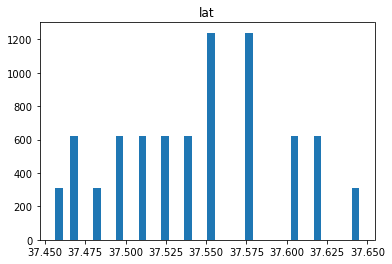

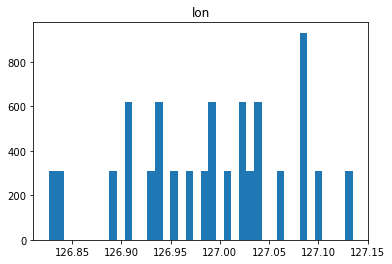

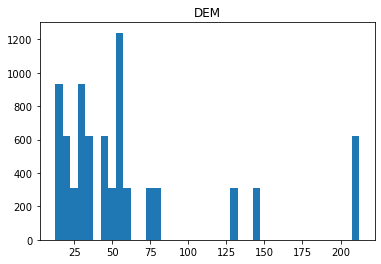

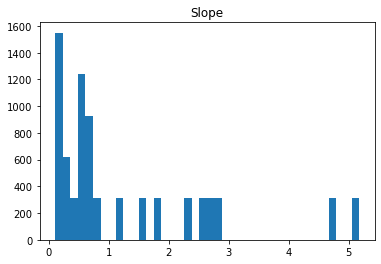

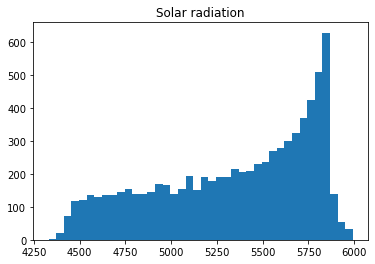

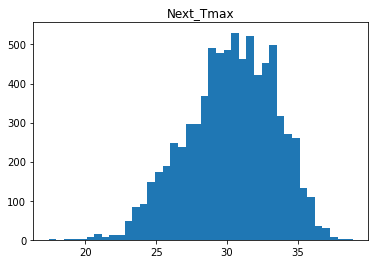

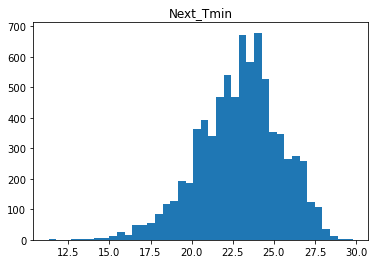

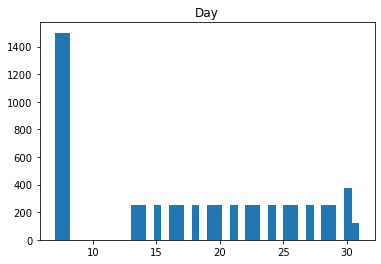

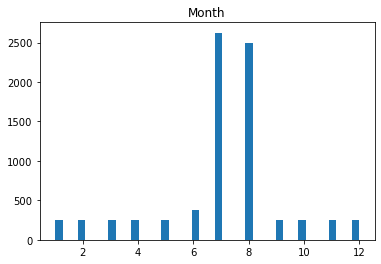

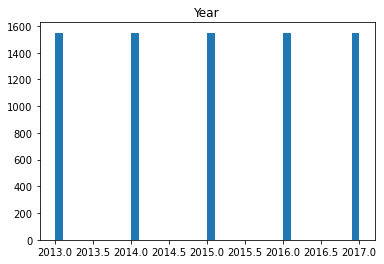

In [26]:
for i in temp.iloc[:,1:]:
    plt.hist(temp[i],bins=40)
    plt.title(i)
    plt.show()
    

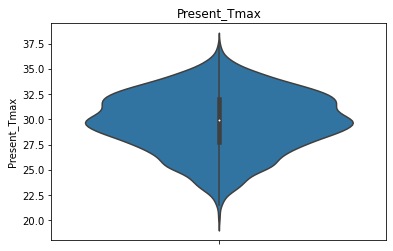

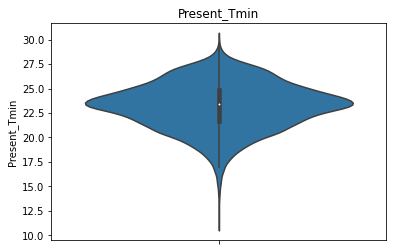

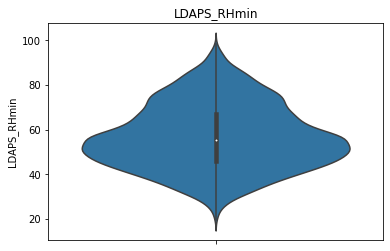

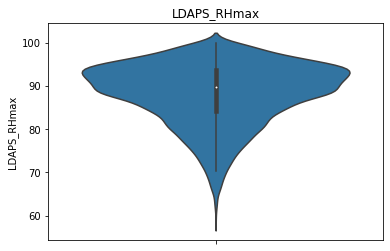

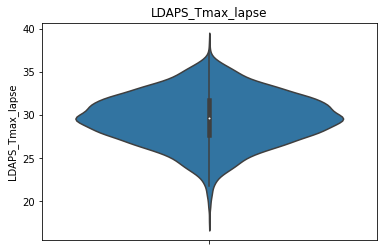

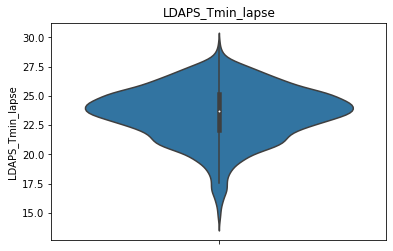

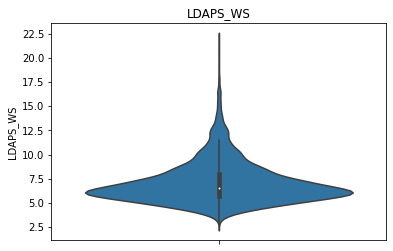

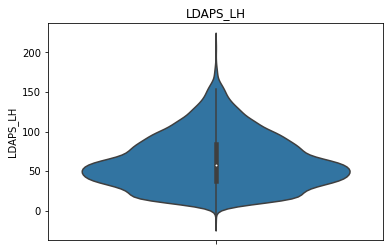

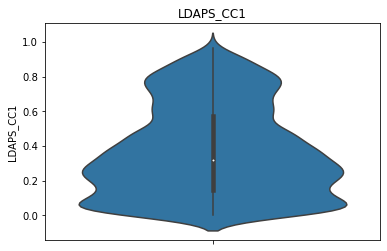

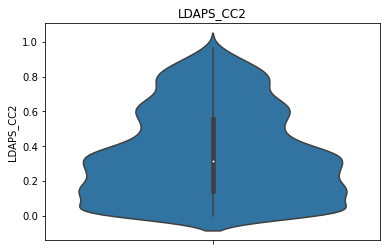

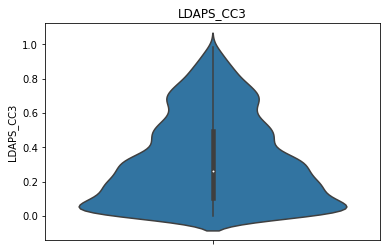

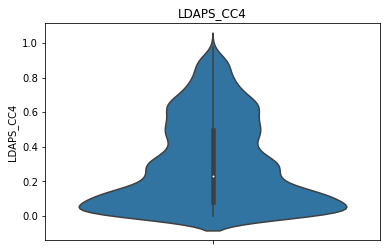

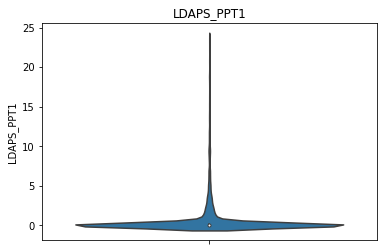

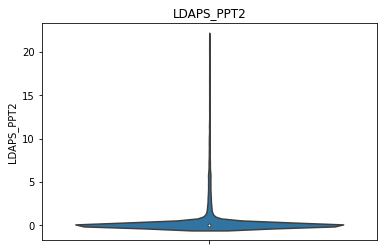

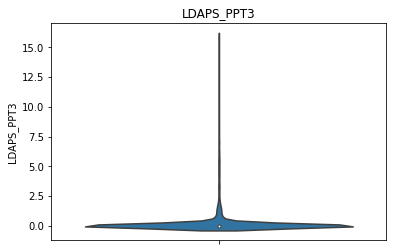

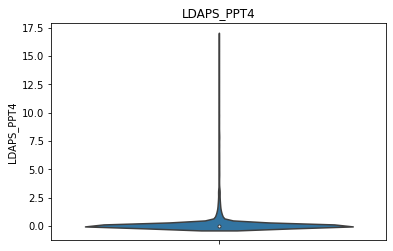

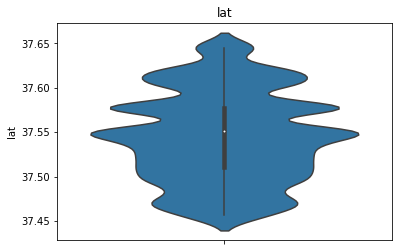

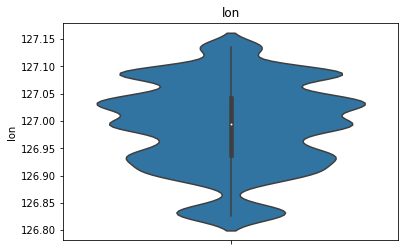

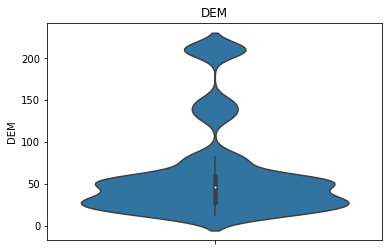

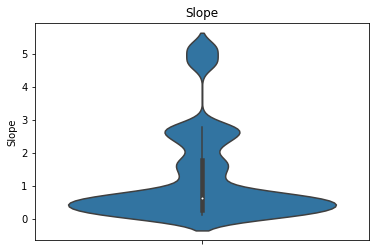

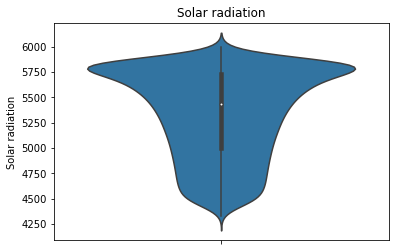

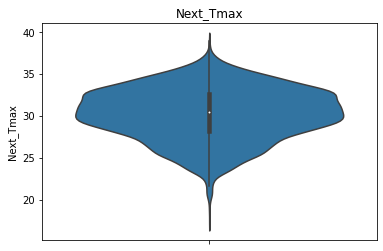

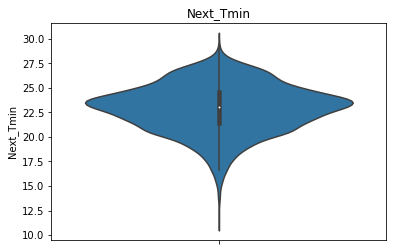

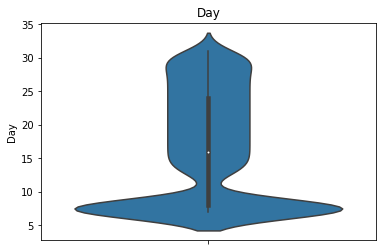

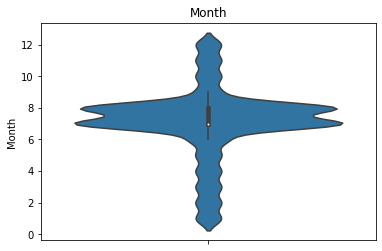

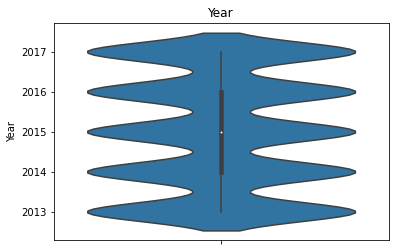

In [31]:
for i in temp.iloc[:,1:]:
    sns.violinplot(y=temp[i])
    plt.title(i)
    plt.show()

In [ ]:
Observation:
    
    1. We see that present Day Max temp ranges between 20 to 37.6°C. Mostly it stays between 27.5 to 33°C.
    2. Min Temp spread from 11.3°C to 29.9°C and mostly lies between 22.5°C to 25°C.
    3. Maximum relative humidity for the next day could be between 19.8% to 98.5% but usually it stays around 50-60%
    4. While Max humidity could be between 58.9 to 100%, it usually lies around 94-95%.
    5. Lapse rated max air temp stays majorly between 28 to 32°C.
    6. Lapse rated min air temperature stays around 22.5 to 25°C.
    7. Average wind speed could range from 2.9 m/s to 21.9 m/s. But in most of the days it was observed to be between 5.0 to 7.5 m/s. We also see some readings showing 22.5m/s which denotes 'Strong Gale' which can cause light damage to buildings and properties.
    8. Usually the latent heat flux 40 to 70 W/m2.
    9. For Clod Cover, first 12 hours of day shows 0.1 to 0.4% cloud cover and towards the end of day it reduces and stays mostly around 0.1%.
    10. Geographical elevation from sea level is normally between 25 to 60 m. Higher values show higher altitudes which could possibly result in reduction of Temperature.
    11. Next Day Max Temp usually stays between 28 to 33°C while Min temperature is between 22.5 to 25.0°C.

# Correlation

In [9]:
temp_cor=temp.corr()
temp_cor

station  Present_Tmax  Present_Tmin  LDAPS_RHmin  \
station           1.000000e+00      0.112786      0.131922    -0.066796   
Present_Tmax      1.127860e-01      1.000000      0.617699    -0.207063   
Present_Tmin      1.319217e-01      0.617699      1.000000     0.120862   
LDAPS_RHmin      -6.679610e-02     -0.207063      0.120862     1.000000   
LDAPS_RHmax      -1.671955e-01     -0.304833     -0.018417     0.578472   
LDAPS_Tmax_lapse  6.922327e-02      0.568958      0.462182    -0.568528   
LDAPS_Tmin_lapse  1.049107e-01      0.622538      0.762218     0.087426   
LDAPS_WS          5.294066e-03     -0.125517     -0.038555     0.292438   
LDAPS_LH         -1.335752e-01      0.133333     -0.012366    -0.073447   
LDAPS_CC1         6.922023e-03     -0.313699      0.082934     0.613375   
LDAPS_CC2         3.397707e-03     -0.215552      0.088750     0.745177   
LDAPS_CC3         6.944115e-04     -0.145727     -0.004560     0.689315   
LDAPS_CC4         6.129371e-03     -0.142388     -0.046170     0.513469   
LDAPS_PPT1       -2.734746e-03     -0.114403      0.109612     0.260812   
LDAPS_PPT2       -8.327957e-03     -0.104792      0.064422     0.390469   
LDAPS_PPT3       -1.260945e-02     -0.126706     -0.051820     0.238624   
LDAPS_PPT4       -1.052866e-02     -0.105768     -0.068977     0.165641   
lat              -2.376097e-01     -0.054132     -0.080519     0.085909   
lon              -1.187626e-01      0.007527     -0.045560    -0.077696   
DEM              -2.559703e-01     -0.188779     -0.252518     0.100944   
Slope            -9.011266e-02     -0.107333     -0.148300     0.122597   
Solar radiation  -1.901065e-02     -0.027008      0.051659     0.243102   
Next_Tmax         1.081546e-01      0.609320      0.469904    -0.441382   
Next_Tmin         1.285390e-01      0.621706      0.795860     0.092732   
Day              -7.467287e-18     -0.143974     -0.108499    -0.065899   
Month             9.230762e-18     -0.001152     -0.003441    -0.053991   
Year              0.000000e+00      0.059869      0.037474    -0.002046   

                  LDAPS_RHmax  LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS  \
station             -0.167196          0.069223          0.104911  0.005294   
Present_Tmax        -0.304833          0.568958          0.622538 -0.125517   
Present_Tmin        -0.018417          0.462182          0.762218 -0.038555   
LDAPS_RHmin          0.578472         -0.568528          0.087426  0.292438   
LDAPS_RHmax          1.000000         -0.377319         -0.117110  0.133479   
LDAPS_Tmax_lapse    -0.377319          1.000000          0.652948 -0.317239   
LDAPS_Tmin_lapse    -0.117110          0.652948          1.000000 -0.133944   
LDAPS_WS             0.133479         -0.317239         -0.133944  1.000000   
LDAPS_LH             0.237121          0.045198         -0.137862  0.002215   
LDAPS_CC1            0.436177         -0.441029          0.009424  0.288147   
LDAPS_CC2            0.390779         -0.526428          0.046304  0.259618   
LDAPS_CC3            0.226132         -0.544270         -0.045665  0.241245   
LDAPS_CC4            0.129667         -0.432172         -0.082003  0.218724   
LDAPS_PPT1           0.268603         -0.117191          0.034237  0.143840   
LDAPS_PPT2           0.228819         -0.249766         -0.003375  0.183573   
LDAPS_PPT3           0.133394         -0.196162         -0.094489  0.152102   
LDAPS_PPT4           0.116427         -0.168065         -0.100741  0.134116   
lat                  0.194782         -0.043896         -0.098014  0.034599   
lon                  0.024226          0.089051         -0.028430 -0.061801   
DEM                  0.176423         -0.180868         -0.197252  0.189109   
Slope                0.218953         -0.164272         -0.187627  0.169553   
Solar radiation      0.147954          0.046232          0.158569  0.120288   
Next_Tmax           -0.287324          0.826628          0.585726 -0.347854   
Next_Tmin           -0.075

<AxesSubplot:>

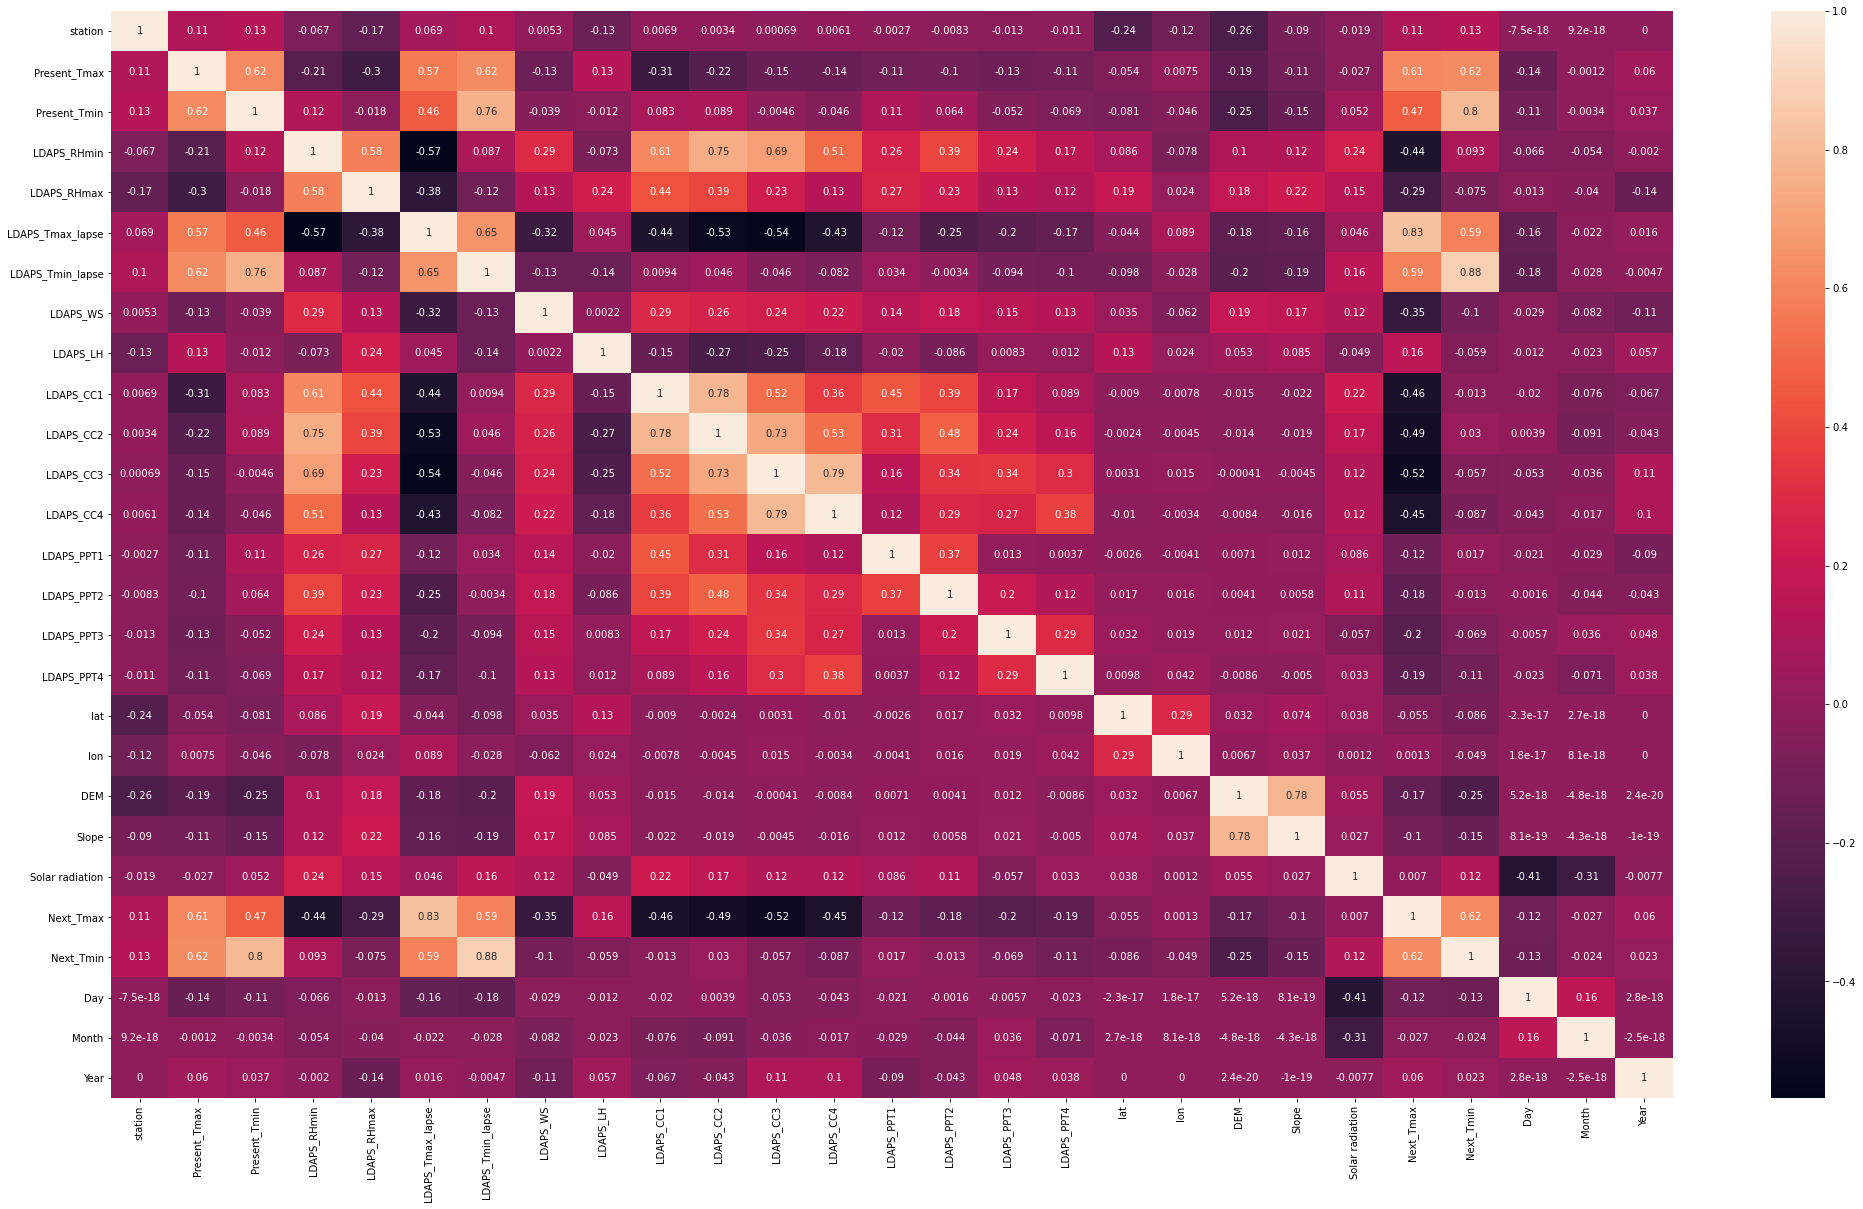

In [10]:
plt.figure(figsize=(35,20))
sns.heatmap(temp_cor,annot=True)

In [11]:
temp_cor['Next_Tmax'].sort_values(ascending=False)

Next_Tmax           1.000000
LDAPS_Tmax_lapse    0.826628
Next_Tmin           0.620119
Present_Tmax        0.609320
LDAPS_Tmin_lapse    0.585726
Present_Tmin        0.469904
LDAPS_LH            0.155309
station             0.108155
Year                0.060091
Solar radiation     0.007014
lon                 0.001303
Month              -0.026865
lat                -0.055268
Slope              -0.104420
Day                -0.116902
LDAPS_PPT1         -0.124580
DEM                -0.174384
LDAPS_PPT2         -0.184855
LDAPS_PPT4         -0.186248
LDAPS_PPT3         -0.201758
LDAPS_RHmax        -0.287324
LDAPS_WS           -0.347854
LDAPS_RHmin        -0.441382
LDAPS_CC4          -0.448859
LDAPS_CC1          -0.455045
LDAPS_CC2          -0.493370
LDAPS_CC3          -0.517427
Name: Next_Tmax, dtype: float64

In [12]:
temp_cor['Next_Tmin'].sort_values(ascending=False)

Next_Tmin           1.000000
LDAPS_Tmin_lapse    0.879808
Present_Tmin        0.795860
Present_Tmax        0.621706
Next_Tmax           0.620119
LDAPS_Tmax_lapse    0.585410
station             0.128539
Solar radiation     0.118532
LDAPS_RHmin         0.092732
LDAPS_CC2           0.029633
Year                0.023181
LDAPS_PPT1          0.017070
LDAPS_PPT2         -0.012667
LDAPS_CC1          -0.012729
Month              -0.024470
lon                -0.048624
LDAPS_CC3          -0.056591
LDAPS_LH           -0.058622
LDAPS_PPT3         -0.068505
LDAPS_RHmax        -0.075301
lat                -0.085509
LDAPS_CC4          -0.086973
LDAPS_WS           -0.100688
LDAPS_PPT4         -0.110230
Day                -0.129587
Slope              -0.148783
DEM                -0.249058
Name: Next_Tmin, dtype: float64

High correlation between Present Day Temperatures and Next day temperatures.

Also Lapse Rate Air Temperature also show high correlation with Next Day Tmax and Tmin.

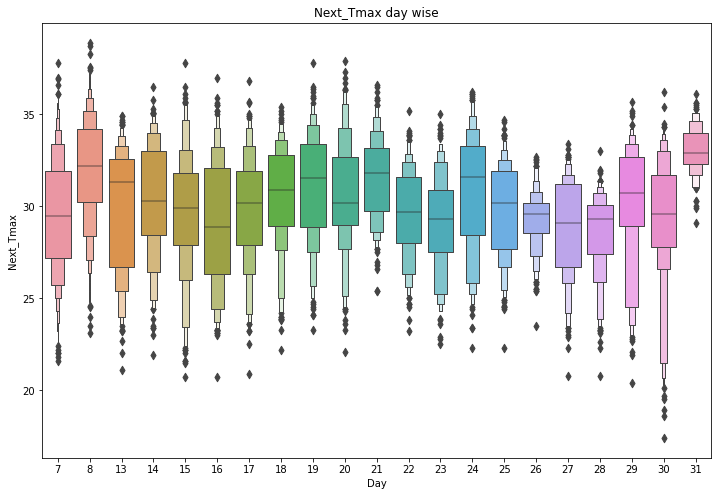

In [28]:
plt.figure(figsize=(12,8))
sns.boxenplot(x='Day',y='Next_Tmax',data=temp)
plt.title('Next_Tmax day wise')
plt.show()

8th Day has higher temperature while 30th day is cooler in comparison. 31st day of the month is usually hot.

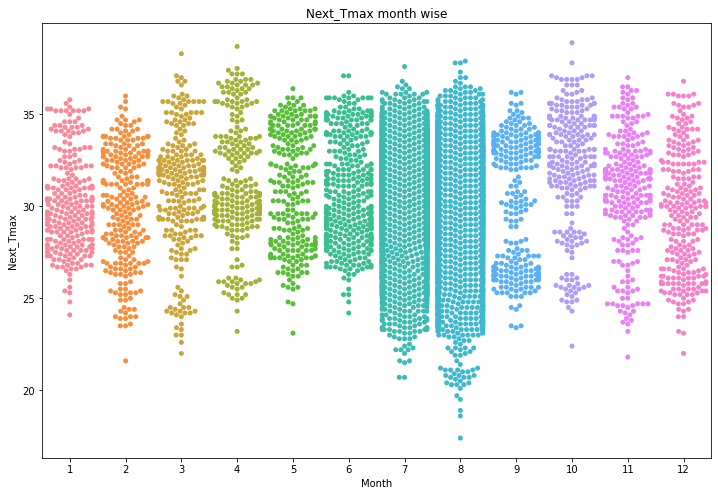

In [33]:
plt.figure(figsize=(12,8))
sns.swarmplot(x='Month',y='Next_Tmax',data=temp)
plt.title('Next_Tmax month wise')
plt.show()

7th and 8th month has fluctuation in temperature with max temp going down to 17°C. 10th Month is usually hotter with temperature mostly around 30 to 37°C. 3rd and 4th month also show higher temperature readings on some days but usually is between 28 to 33°C.

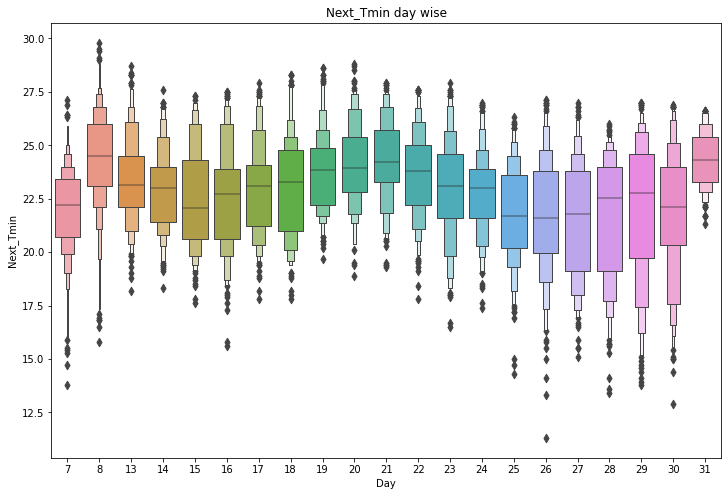

In [50]:
plt.figure(figsize=(12,8))
sns.boxenplot(x='Day',y='Next_Tmin',data=temp)
plt.title('Next_Tmin day wise')
plt.show()

26th day show variation in temp.Min temp dips to 11.3°C. 31st day is on hotter side.

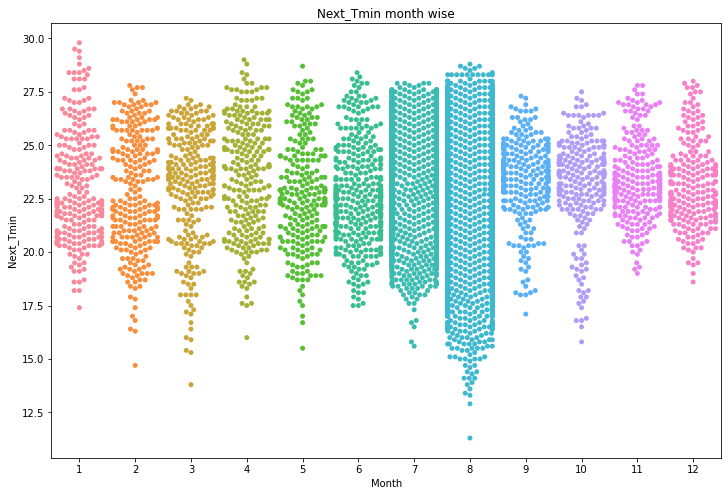

In [49]:
plt.figure(figsize=(12,8))
sns.swarmplot(x='Month',y='Next_Tmin',data=temp)
plt.title('Next_Tmin month wise')
plt.show()

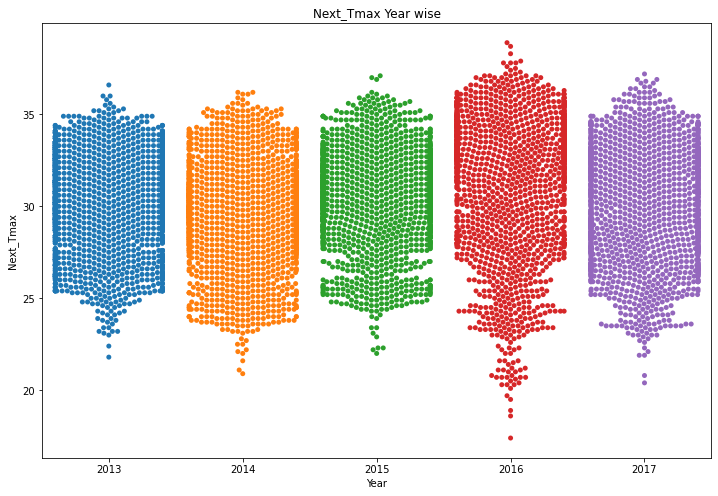

In [52]:
plt.figure(figsize=(12,8))
sns.swarmplot(x='Year',y='Next_Tmax',data=temp)
plt.title('Next_Tmax Year wise')
plt.show()

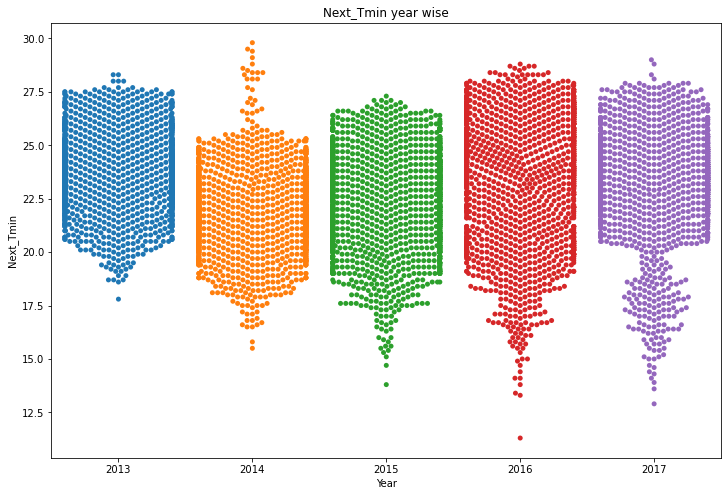

In [51]:
plt.figure(figsize=(12,8))
sns.swarmplot(x='Year',y='Next_Tmin',data=temp)
plt.title('Next_Tmin year wise')
plt.show()

We see 2013 is comparatively hot as the min temp usually was above 17.5°C while 2016 do have high temp readings but also saw colder days with min temp dropping to 11.3°C.

Lets Check the relation of various features with Target Variables.

In [53]:
# Defining column list to be analysed

cols=['LDAPS_Tmin_lapse','LDAPS_Tmax_lapse','Present_Tmin','Present_Tmax','LDAPS_CC4']

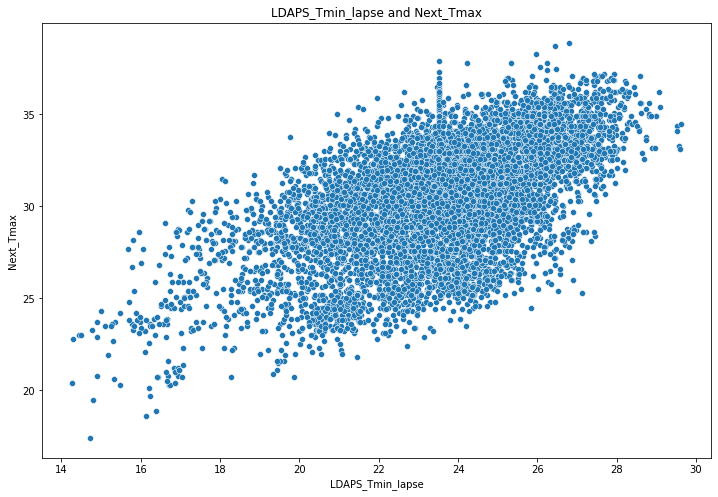

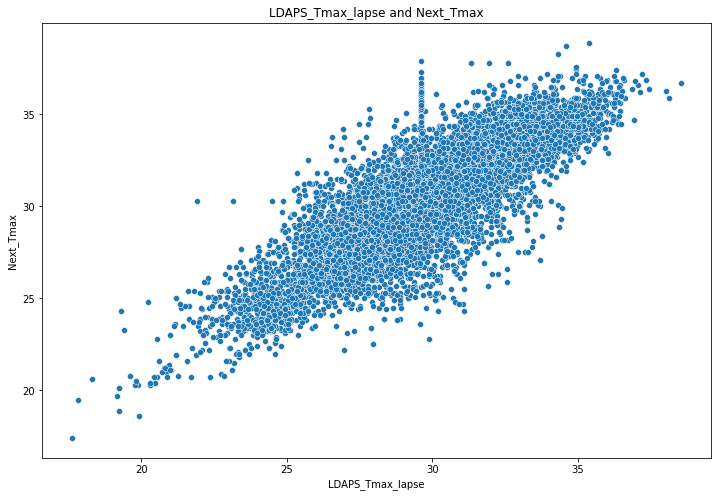

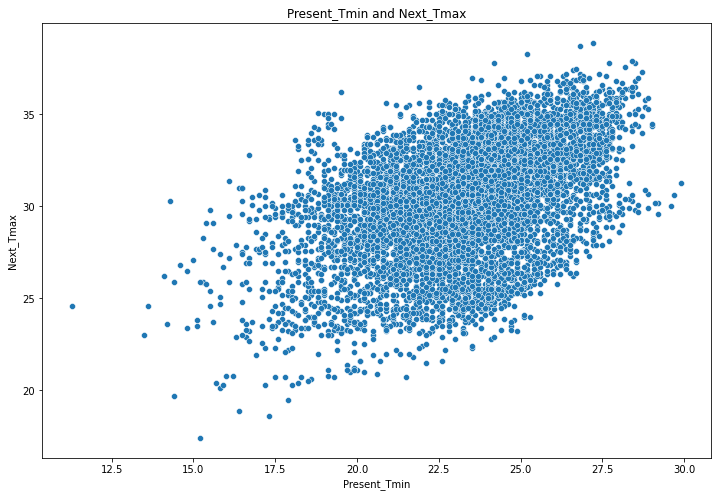

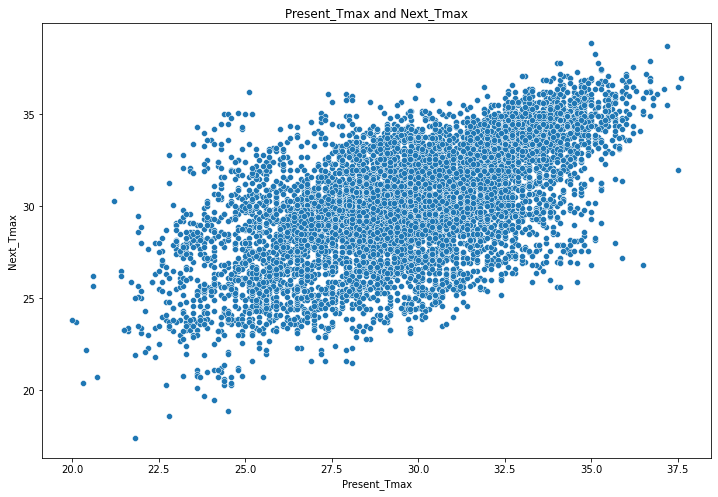

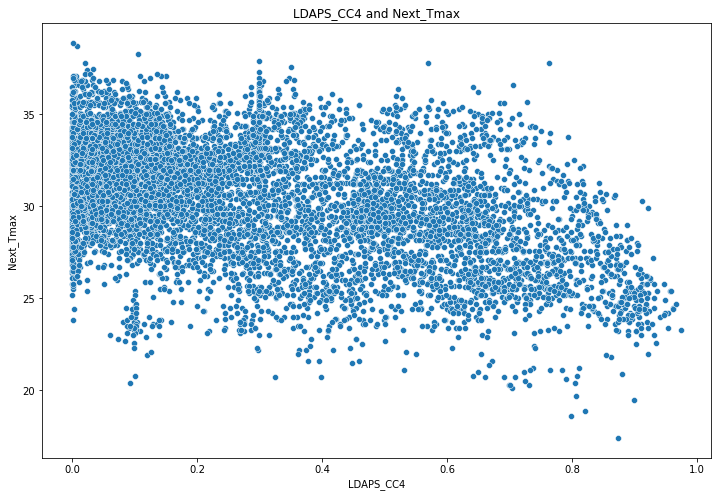

In [54]:
for i in cols:
    plt.figure(figsize=(12,8))
    sns.scatterplot(x=i,y='Next_Tmax',data=temp)
    plt.title(i + ' and Next_Tmax')
    plt.show()

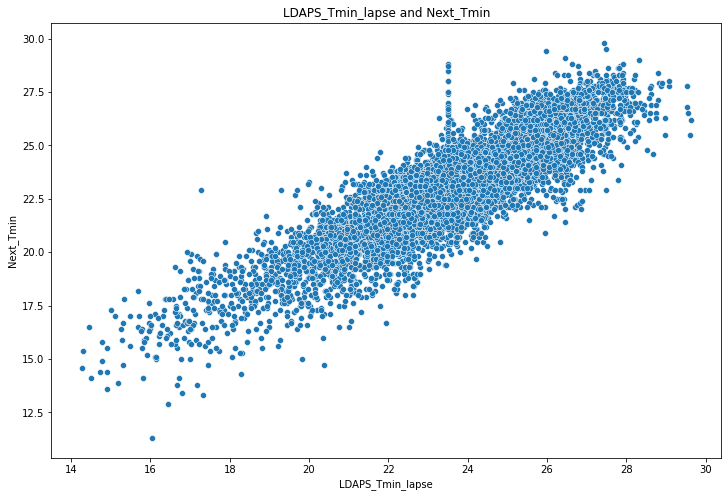

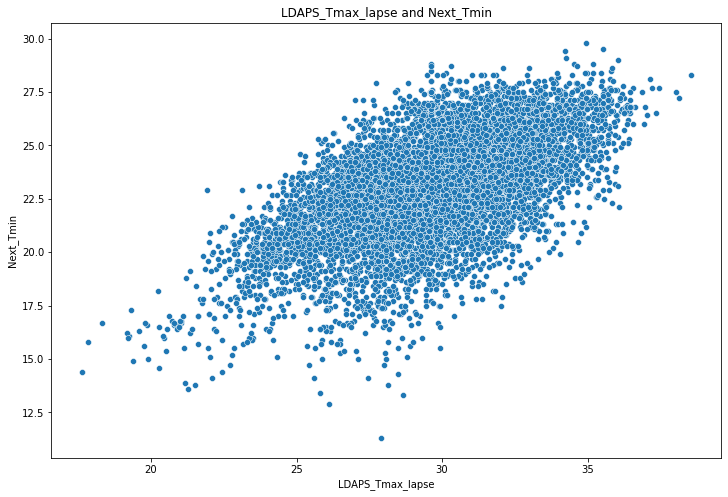

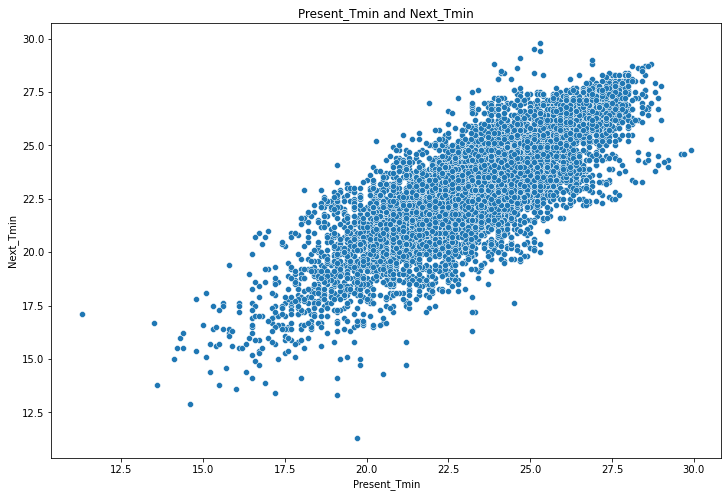

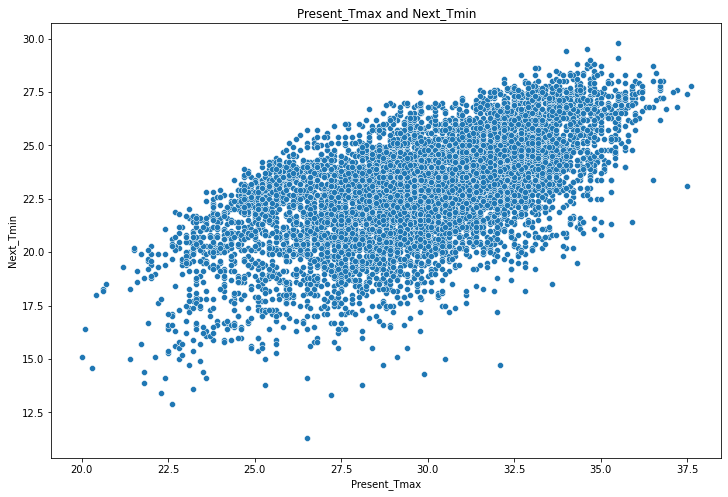

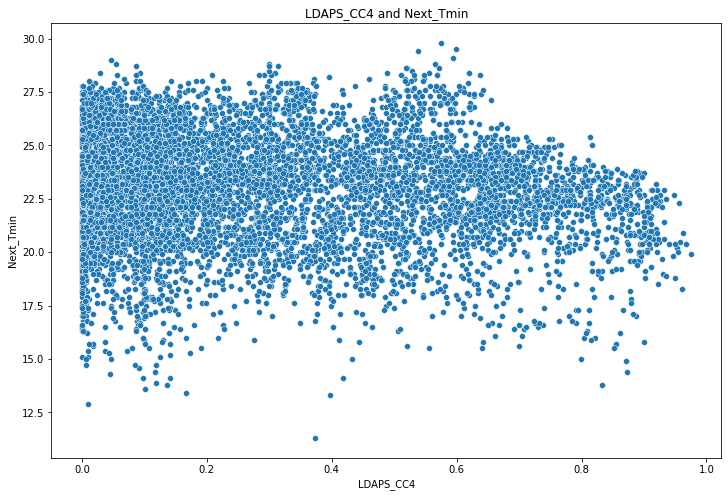

In [55]:
for i in cols:
    plt.figure(figsize=(12,8))
    sns.scatterplot(x=i,y='Next_Tmin',data=temp)
    plt.title(i + ' and Next_Tmin')
    plt.show()

Positive correlation is seen between Lapse Rate Max, Min temp, Present Day Max,Min temp and Next Day Max,Min temp. For Cloud cover we see negative relation.  

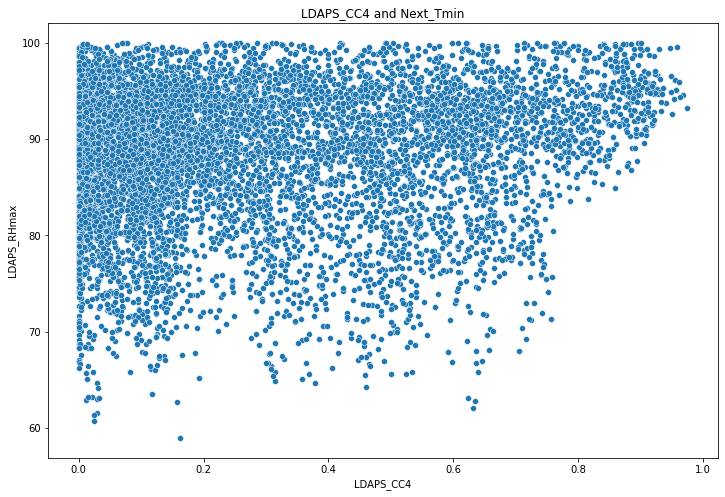

In [56]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='LDAPS_CC4',y='LDAPS_RHmax',data=temp)
plt.title('Max Relative Humidity and Cloud Cover')
plt.show()

As the cloud cover increases, temp dips but humidity increases. 

# Checking Outliers

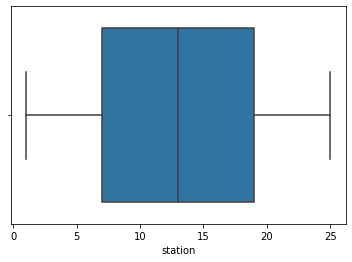

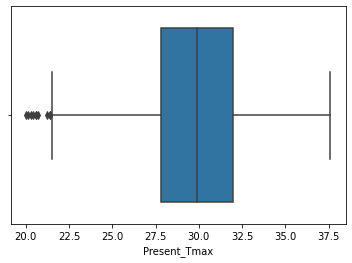

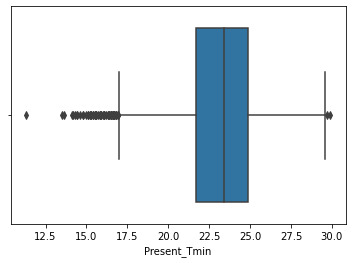

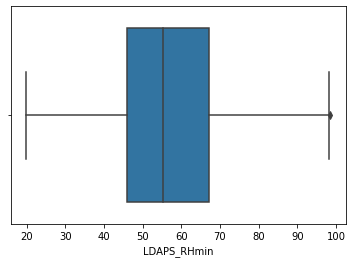

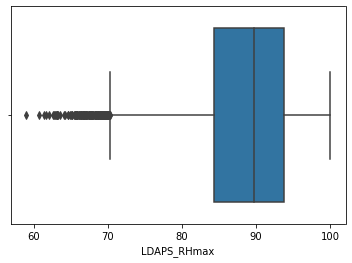

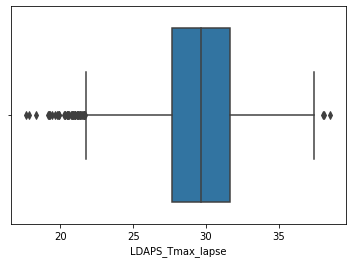

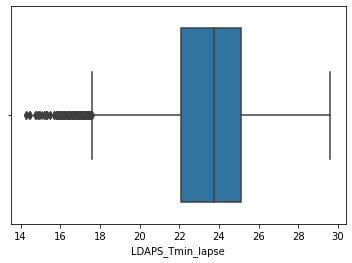

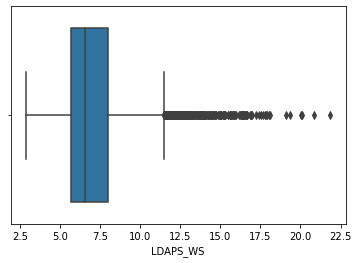

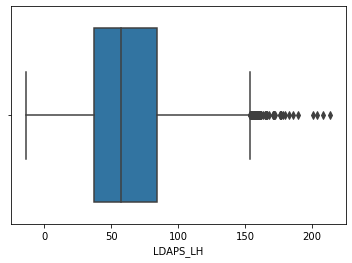

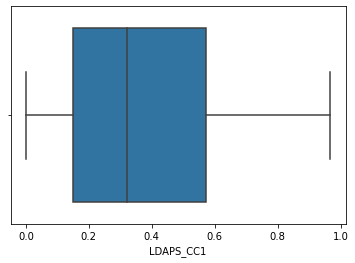

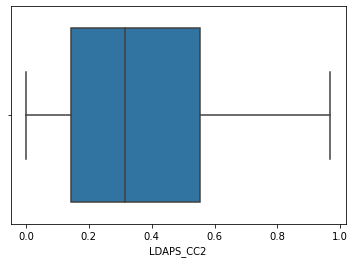

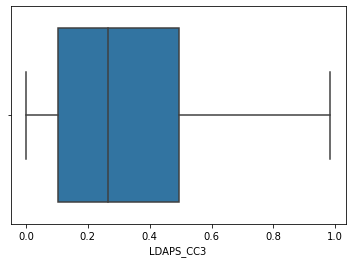

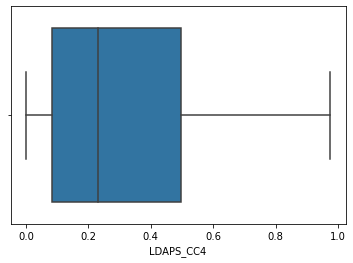

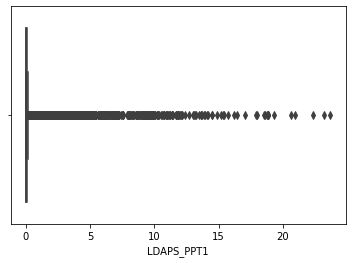

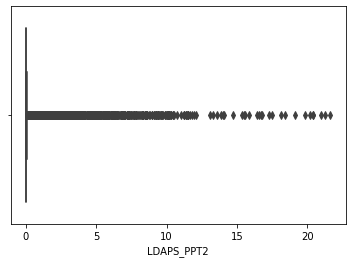

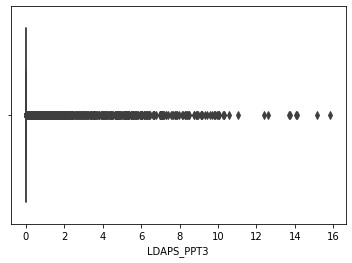

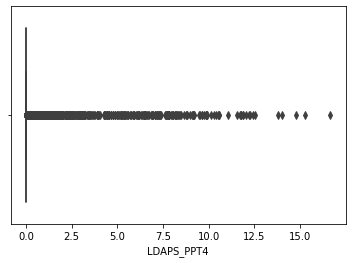

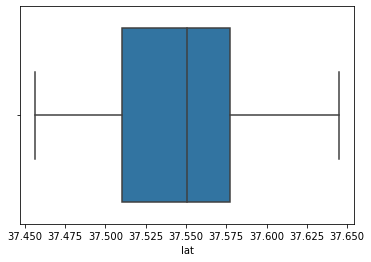

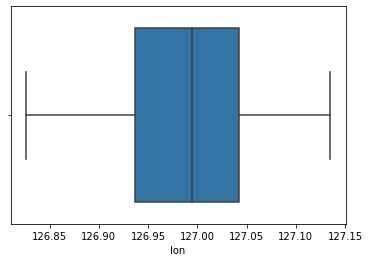

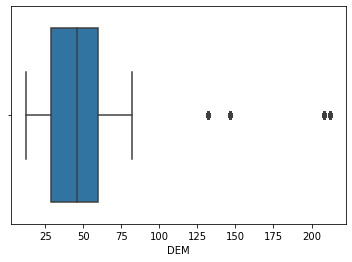

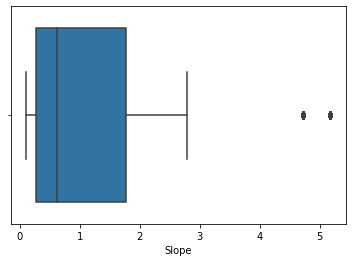

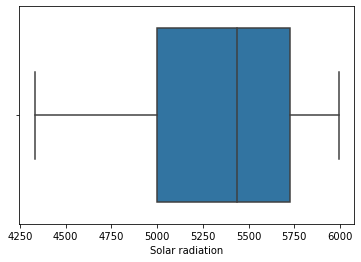

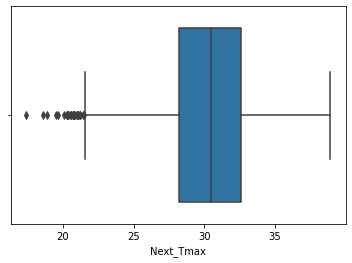

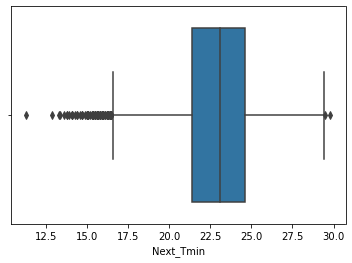

In [57]:
for i in temp.iloc[:,:-3]:
    sns.boxplot(temp[i])
    plt.show()

No extreme outliers detected here. We see some values outside whiskers but that is because the atmospheric values stays in a defined range and sometimes show a hike or a dip. Thus these values can be realistic and should not be treated as outliers.

# Checking Skewness

In [86]:
temp.skew().sort_values(ascending=False)

LDAPS_PPT4          6.743231
LDAPS_PPT3          6.368693
LDAPS_PPT2          5.713247
LDAPS_PPT1          5.324404
DEM                 1.723944
Slope               1.563346
LDAPS_WS            1.556422
LDAPS_LH            0.667582
LDAPS_CC4           0.665829
LDAPS_CC3           0.640088
LDAPS_CC2           0.471965
LDAPS_CC1           0.459193
LDAPS_RHmin         0.300229
Day                 0.245482
lat                 0.086942
Year                0.000000
station             0.000000
LDAPS_Tmax_lapse   -0.224207
Present_Tmax       -0.263013
lon                -0.285300
Next_Tmax          -0.335956
Present_Tmin       -0.357565
Next_Tmin          -0.396873
Solar radiation    -0.511006
LDAPS_Tmin_lapse   -0.579033
Month              -0.705241
LDAPS_RHmax        -0.850657
dtype: float64

# Correcting Skewness

In [94]:
# USing Cuberoot Transform

In [101]:
for i in temp.iloc[:,:]:
    if (temp[i].skew()>0.5 or temp[i].skew()<(-0.5)):
        temp[i]=np.cbrt(temp[i].values.reshape(-1,1))

In [102]:
temp.skew().sort_values(ascending=False)

LDAPS_PPT4          1.106557
LDAPS_PPT3          0.787100
LDAPS_PPT2          0.697600
LDAPS_WS            0.578949
LDAPS_PPT1          0.516679
LDAPS_CC2           0.471965
DEM                 0.468614
LDAPS_CC1           0.459193
LDAPS_RHmin         0.300229
Slope               0.250818
Day                 0.245482
lat                 0.086942
Year                0.000000
station             0.000000
LDAPS_Tmax_lapse   -0.224207
Present_Tmax       -0.263013
lon                -0.285300
Next_Tmax          -0.335956
LDAPS_LH           -0.352356
Present_Tmin       -0.357565
Next_Tmin          -0.396873
LDAPS_CC4          -0.466389
Solar radiation    -0.607287
LDAPS_Tmin_lapse   -0.951134
LDAPS_RHmax        -1.073291
Month              -2.351967
LDAPS_CC3          -9.961332
dtype: float64

# Splitting Input and Target Variables

In [103]:
x=temp.drop(['Next_Tmax','Next_Tmin'],axis=1)
y=temp[['Next_Tmax','Next_Tmin']].copy()
print(x.head(10))
print(y.head(10))
print(x.shape)
print(y.shape)

   station  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
0      1.0          28.7          21.4    58.255688     1.018742   
1      2.0          31.9          21.6    52.263397     1.018718   
2      3.0          31.6          23.3    48.690479     1.018400   
3      4.0          32.0          23.4    58.239788     1.018982   
4      5.0          31.4          21.9    56.174095     1.018697   
5      6.0          31.9          23.5    52.437126     1.018466   
6      7.0          31.4          24.4    56.287189     1.018250   
7      8.0          32.1          23.6    52.326218     1.018091   
8      9.0          31.4          22.0    55.338791     1.018238   
9     10.0          31.6          20.5    56.651203     1.018541   

   LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS  LDAPS_LH  LDAPS_CC1  \
0         28.074101          1.012988  1.007931  4.110499   0.233947   
1         29.850689          1.013170  1.007182  3.731014   0.225508   
2         30.091292          1.0132

# Scaling

In [104]:
# Using Standard Scaler

from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [105]:
x_new=sc.fit_transform(x)
x=pd.DataFrame(x_new,columns=x.columns)
x.head()

station  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
0 -1.664101     -0.361782     -0.761303     0.102641     0.402208   
1 -1.525426      0.721742     -0.677906    -0.308235     0.335538   
2 -1.386750      0.620161      0.030967    -0.553222    -0.564174   
3 -1.248075      0.755602      0.072665     0.101551     1.079957   
4 -1.109400      0.552441     -0.552811    -0.040089     0.276643   

   LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS  LDAPS_LH  LDAPS_CC1  \
0         -0.525837         -0.159971  0.000041  0.374008  -0.516304   
1          0.080886          0.261896 -0.655071 -0.130878  -0.548629   
2          0.163054          0.472656 -0.381367 -1.449242  -0.610543   
3          0.031005         -0.026994 -0.681815  0.274443  -0.583623   
4         -0.170723          0.039096 -0.627716  1.240394  -0.832456   

   LDAPS_CC2  LDAPS_CC3  LDAPS_CC4  LDAPS_PPT1  LDAPS_PPT2  LDAPS_PPT3  \
0  -0.592721   0.093030  -0.354285    -0.77468   -0.710464   -0.681264   
1  -0.406217   0.092441  -0.371988    -0.77468   -0.710464   -0.681264   
2  -0.384020   0.102798  -0.294538    -0.77468   -0.710464   -0.681264   
3  -0.506603   0.092889  -0.336223    -0.77468   -0.710464   -0.681264   
4  -0.413136   0.097268  -0.158231    -0.77468   -0.710464   -0.681264   

   LDAPS_PPT4       lat       lon       DEM     Slope  Solar radiation  \
0   -0.589722  1.189704 -0.005038  2.079467  1.254718         1.437364   
1   -0.589722  1.189704  0.511327 -0.044869 -0.331920         1.184310   
2   -0.589722  0.653264  0.838778 -0.434586 -0.874031         1.172393   
3   -0.589722  1.992377  0.385384 -0.016914  1.158269         1.158736   
4   -0.589722  0.118811  1.808536 -0.368085 -0.346308         1.164099   

        Day     Month      Year  
0  1.653848 -0.170913 -1.414214  
1  1.653848 -0.170913 -1.414214  
2  1.653848 -0.170913 -1.414214  
3  1.653848 -0.170913 -1.414214  
4  1.653848 -0.170913 -1.414214

# Creating Train Test Split

In [75]:
# Importing Regression Algorithms & Metrics
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso,Ridge,ElasticNet
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [106]:
maxAccu=0
maxRs=0
for i in range(1,500):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.33,random_state=i)
    lr=LinearRegression()
    lr.fit(x_train,y_train)
    lr_pred=lr.predict(x_test)
    acc=r2_score(y_test,lr_pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRs=i
print('Best R2 Score is : ', maxAccu, ' when Random state is : ',maxRs)

Best R2 Score is :  0.8062684206555221  when Random state is :  30


In [107]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.33,random_state=30)

In [108]:
# Defining Model List which support Multi Regression

model_list=[LinearRegression(),DecisionTreeRegressor(),KNeighborsRegressor(),RandomForestRegressor(),Lasso(),Ridge(),ElasticNet()]

In [109]:
# Creating For loop to print Training and Test accuracy score
for m in model_list:
    model=m
    model.fit(x_train,y_train)
    model_pred_train=model.predict(x_train)
    model_pred=model.predict(x_test)
    print('Training Accuracy for the model ',m,' is: ',r2_score(y_train,model_pred_train)*100)
    print('Testing Accuracy for the model ',m,' is: ',r2_score(y_test,model_pred)*100)
    print('\n')

Training Accuracy for the model  LinearRegression()  is:  78.6071722407622
Testing Accuracy for the model  LinearRegression()  is:  80.62684206555221


Training Accuracy for the model  DecisionTreeRegressor()  is:  100.0
Testing Accuracy for the model  DecisionTreeRegressor()  is:  77.37195974224356


Training Accuracy for the model  KNeighborsRegressor()  is:  90.49000163210644
Testing Accuracy for the model  KNeighborsRegressor()  is:  86.53111026197926


Training Accuracy for the model  RandomForestRegressor()  is:  98.51872095055742
Testing Accuracy for the model  RandomForestRegressor()  is:  90.3195178628995


Training Accuracy for the model  Lasso()  is:  58.53685689438666
Testing Accuracy for the model  Lasso()  is:  60.016761570080845


Training Accuracy for the model  Ridge()  is:  78.60716422064533
Testing Accuracy for the model  Ridge()  is:  80.62706459598475


Training Accuracy for the model  ElasticNet()  is:  63.98543849357865
Testing Accuracy for the model  ElasticNet(

# Cross Validation

In [110]:
from sklearn.model_selection import cross_val_score

In [111]:
# Linear Regression
lr=LinearRegression()
lr.fit(x_train,y_train)
lr_pred=lr.predict(x_test)
testing_accu=r2_score(y_test,lr_pred)*100
for k in range(2,10):
    cv_score=cross_val_score(lr,x,y,cv=k)
    cv_mean=cv_score.mean()*100
    print(f'At crossfold {k} the CV score of is {cv_mean} and the accuracy for testing is {testing_accu} ')
    print('\n')

At crossfold 2 the CV score of is 69.80776926824849 and the accuracy for testing is 80.62684206555221 


At crossfold 3 the CV score of is 71.93733303202693 and the accuracy for testing is 80.62684206555221 


At crossfold 4 the CV score of is 72.44301098598424 and the accuracy for testing is 80.62684206555221 


At crossfold 5 the CV score of is 71.1705415499233 and the accuracy for testing is 80.62684206555221 


At crossfold 6 the CV score of is 71.10002915319544 and the accuracy for testing is 80.62684206555221 


At crossfold 7 the CV score of is 71.70887507931948 and the accuracy for testing is 80.62684206555221 


At crossfold 8 the CV score of is 71.55330822759872 and the accuracy for testing is 80.62684206555221 


At crossfold 9 the CV score of is 63.97307462251932 and the accuracy for testing is 80.62684206555221 




In [112]:
# DecisionTreeClassifier
dtr=DecisionTreeRegressor()
dtr.fit(x_train,y_train)
dtr_pred=dtr.predict(x_test)
testing_accu=r2_score(y_test,dtr_pred)*100
for k in range(2,10):
    cv_score=cross_val_score(dtr,x,y,cv=k)
    cv_mean=cv_score.mean()*100
    print(f'At crossfold {k} the CV score of is {cv_mean} and the accuracy for testing is {testing_accu} ')
    print('\n')

At crossfold 2 the CV score of is 44.03984362879483 and the accuracy for testing is 77.91669270214305 


At crossfold 3 the CV score of is 44.89347361302994 and the accuracy for testing is 77.91669270214305 


At crossfold 4 the CV score of is 43.9531794625139 and the accuracy for testing is 77.91669270214305 


At crossfold 5 the CV score of is 43.59456088685018 and the accuracy for testing is 77.91669270214305 


At crossfold 6 the CV score of is 40.01925794512016 and the accuracy for testing is 77.91669270214305 


At crossfold 7 the CV score of is 40.9180078644452 and the accuracy for testing is 77.91669270214305 


At crossfold 8 the CV score of is 39.43362709290725 and the accuracy for testing is 77.91669270214305 


At crossfold 9 the CV score of is 25.01103646686214 and the accuracy for testing is 77.91669270214305 




In [113]:
# Cross validating KNeighbor Regressor
knn=KNeighborsRegressor()
knn.fit(x_train,y_train)
knn_pred=knn.predict(x_test)
testing_accu=r2_score(y_test,knn_pred)*100
for k in range(2,10):
    cv_score=cross_val_score(knn,x,y,cv=k)
    cv_mean=cv_score.mean()*100
    print(f'At crossfold {k} the CV score of is {cv_mean} and the accuracy for testing is {testing_accu} ')
    print('\n')

At crossfold 2 the CV score of is 47.973037717484544 and the accuracy for testing is 86.53111026197926 


At crossfold 3 the CV score of is 52.582216119167924 and the accuracy for testing is 86.53111026197926 


At crossfold 4 the CV score of is 50.3534833649511 and the accuracy for testing is 86.53111026197926 


At crossfold 5 the CV score of is 51.60166340908281 and the accuracy for testing is 86.53111026197926 


At crossfold 6 the CV score of is 51.318132522112236 and the accuracy for testing is 86.53111026197926 


At crossfold 7 the CV score of is 52.14237656728354 and the accuracy for testing is 86.53111026197926 


At crossfold 8 the CV score of is 50.45797949053136 and the accuracy for testing is 86.53111026197926 


At crossfold 9 the CV score of is 38.87623104375004 and the accuracy for testing is 86.53111026197926 




# Ensemble Technique

In [114]:
# Cross validating RandomForestRegressor
rfr=RandomForestRegressor()
rfr.fit(x_train,y_train)
rfr_pred=rfr.predict(x_test)
testing_accu=r2_score(y_test,rfr_pred)*100
for k in range(2,10):
    cv_score=cross_val_score(rfr,x,y,cv=k)
    cv_mean=cv_score.mean()*100
    print(f'At crossfold {k} the CV score of is {cv_mean} and the accuracy for testing is {testing_accu} ')
    print('\n')

At crossfold 2 the CV score of is 69.32934777805258 and the accuracy for testing is 90.2378342514375 


At crossfold 3 the CV score of is 70.305895744303 and the accuracy for testing is 90.2378342514375 


At crossfold 4 the CV score of is 70.98906451534386 and the accuracy for testing is 90.2378342514375 


At crossfold 5 the CV score of is 70.58940685533905 and the accuracy for testing is 90.2378342514375 


At crossfold 6 the CV score of is 69.47399153893451 and the accuracy for testing is 90.2378342514375 


At crossfold 7 the CV score of is 69.9001436591489 and the accuracy for testing is 90.2378342514375 


At crossfold 8 the CV score of is 69.38067942801617 and the accuracy for testing is 90.2378342514375 


At crossfold 9 the CV score of is 61.277708429208644 and the accuracy for testing is 90.2378342514375 




# Regularization

In [115]:
# Cross validating Lasso
ls=Lasso()
ls.fit(x_train,y_train)
ls_pred=ls.predict(x_test)
testing_accu=r2_score(y_test,ls_pred)*100
for k in range(2,10):
    cv_score=cross_val_score(ls,x,y,cv=k)
    cv_mean=cv_score.mean()*100
    print(f'At crossfold {k} the CV score of is {cv_mean} and the accuracy for testing is {testing_accu} ')
    print('\n')

At crossfold 2 the CV score of is 52.227136854574695 and the accuracy for testing is 60.016761570080845 


At crossfold 3 the CV score of is 50.83654025845375 and the accuracy for testing is 60.016761570080845 


At crossfold 4 the CV score of is 54.268850239830805 and the accuracy for testing is 60.016761570080845 


At crossfold 5 the CV score of is 54.20513166294503 and the accuracy for testing is 60.016761570080845 


At crossfold 6 the CV score of is 51.66417905821851 and the accuracy for testing is 60.016761570080845 


At crossfold 7 the CV score of is 52.875274790755455 and the accuracy for testing is 60.016761570080845 


At crossfold 8 the CV score of is 51.21125357853589 and the accuracy for testing is 60.016761570080845 


At crossfold 9 the CV score of is 31.42139343730011 and the accuracy for testing is 60.016761570080845 




In [116]:
# Cross validating Ridge
rd=Ridge()
rd.fit(x_train,y_train)
rd_pred=rd.predict(x_test)
testing_accu=r2_score(y_test,rd_pred)*100
for k in range(2,10):
    cv_score=cross_val_score(rd,x,y,cv=k)
    cv_mean=cv_score.mean()*100
    print(f'At crossfold {k} the CV score of is {cv_mean} and the accuracy for testing is {testing_accu} ')
    print('\n')

At crossfold 2 the CV score of is 69.82374173783035 and the accuracy for testing is 80.62706459598475 


At crossfold 3 the CV score of is 71.94276497826789 and the accuracy for testing is 80.62706459598475 


At crossfold 4 the CV score of is 72.44622583010812 and the accuracy for testing is 80.62706459598475 


At crossfold 5 the CV score of is 71.17420979725463 and the accuracy for testing is 80.62706459598475 


At crossfold 6 the CV score of is 71.10158661657215 and the accuracy for testing is 80.62706459598475 


At crossfold 7 the CV score of is 71.71003824071079 and the accuracy for testing is 80.62706459598475 


At crossfold 8 the CV score of is 71.55484326986357 and the accuracy for testing is 80.62706459598475 


At crossfold 9 the CV score of is 63.97427560609705 and the accuracy for testing is 80.62706459598475 




In [117]:
# Cross validating ElasticNet
elc=ElasticNet()
elc.fit(x_train,y_train)
elc_pred=elc.predict(x_test)
testing_accu=r2_score(y_test,elc_pred)*100
for k in range(2,10):
    cv_score=cross_val_score(elc,x,y,cv=k)
    cv_mean=cv_score.mean()*100
    print(f'At crossfold {k} the CV score of is {cv_mean} and the accuracy for testing is {testing_accu} ')
    print('\n')

At crossfold 2 the CV score of is 57.292836228107966 and the accuracy for testing is 66.03211905623698 


At crossfold 3 the CV score of is 57.21715491232333 and the accuracy for testing is 66.03211905623698 


At crossfold 4 the CV score of is 59.25827271008691 and the accuracy for testing is 66.03211905623698 


At crossfold 5 the CV score of is 58.577924452644545 and the accuracy for testing is 66.03211905623698 


At crossfold 6 the CV score of is 56.84545013811576 and the accuracy for testing is 66.03211905623698 


At crossfold 7 the CV score of is 57.62953736686164 and the accuracy for testing is 66.03211905623698 


At crossfold 8 the CV score of is 56.38073368831492 and the accuracy for testing is 66.03211905623698 


At crossfold 9 the CV score of is 41.25501369932676 and the accuracy for testing is 66.03211905623698 




We observe best performance with Linear Regression. We tried regularizing the model and got similar result with Ridge Regressor.

We will try hyper tuning the Ridge model to check for improvements if any. 

# Hyper Tuning Parameters

In [118]:
# Importing Gridsearch CV

from sklearn.model_selection import GridSearchCV

In [119]:
# defining parameters


rd_param={'alpha':[0.0001,0.001,0.01,0.1,1.0,10],'random_state':list(range(0,10))}
gcv_rd= GridSearchCV(estimator=rd,param_grid=rd_param,cv=5)

In [120]:
# Getting Best Parameters

gcv_rd.fit(x_train,y_train)
gcv_rd.best_params_

{'alpha': 10, 'random_state': 0}

In [121]:
# Traing with best parameters and Cross validating Ridge
rd1=Ridge(alpha=10,random_state=0)
rd1.fit(x_train,y_train)
rd1_pred=rd1.predict(x_test)
testing_accu=r2_score(y_test,rd1_pred)*100
for k in range(2,10):
    cv_score=cross_val_score(rd1,x,y,cv=k)
    cv_mean=cv_score.mean()*100
    print(f'At crossfold {k} the CV score of is {cv_mean} and the accuracy for testing is {testing_accu} ')
    print('\n')

At crossfold 2 the CV score of is 69.96061080148334 and the accuracy for testing is 80.62839659700592 


At crossfold 3 the CV score of is 71.98974539144078 and the accuracy for testing is 80.62839659700592 


At crossfold 4 the CV score of is 72.47399053292442 and the accuracy for testing is 80.62839659700592 


At crossfold 5 the CV score of is 71.20602286468292 and the accuracy for testing is 80.62839659700592 


At crossfold 6 the CV score of is 71.11480241975839 and the accuracy for testing is 80.62839659700592 


At crossfold 7 the CV score of is 71.71982516742811 and the accuracy for testing is 80.62839659700592 


At crossfold 8 the CV score of is 71.56789330548986 and the accuracy for testing is 80.62839659700592 


At crossfold 9 the CV score of is 63.98427898672689 and the accuracy for testing is 80.62839659700592 




Similar result is observed even after tuning. We will plot the graphs and check.

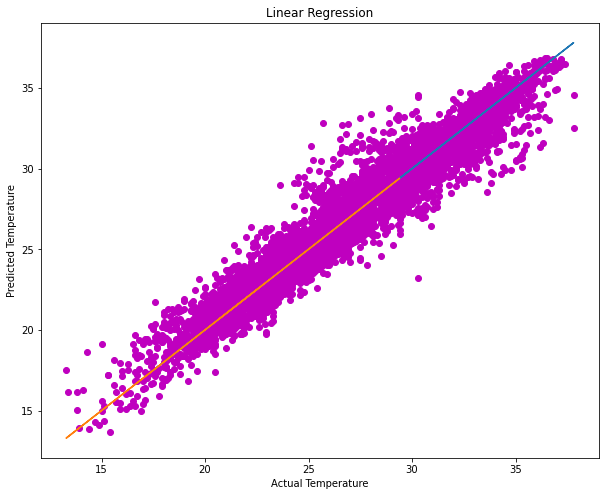

In [122]:
# Linear Regression

plt.figure(figsize=(10,8))
plt.scatter(x=y_test,y=lr_pred,color='m')
plt.plot(y_test,y_test)
plt.xlabel('Actual Temperature')
plt.ylabel('Predicted Temperature')
plt.title("Linear Regression")
plt.show()

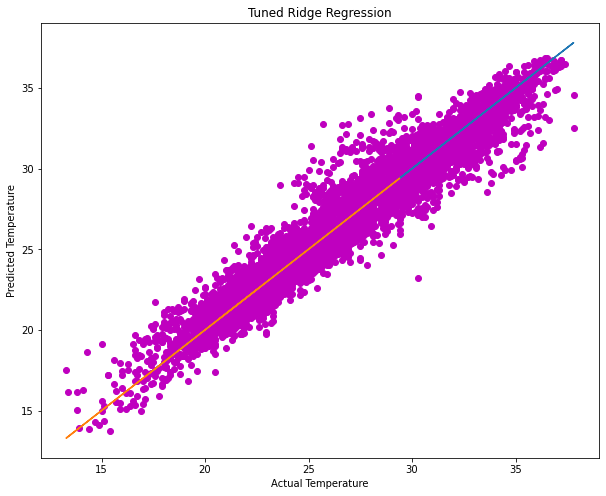

In [123]:
# Tuned Ridge Regression

plt.figure(figsize=(10,8))
plt.scatter(x=y_test,y=rd1_pred,color='m')
plt.plot(y_test,y_test)
plt.xlabel('Actual Temperature')
plt.ylabel('Predicted Temperature')
plt.title("Tuned Ridge Regression")
plt.show()

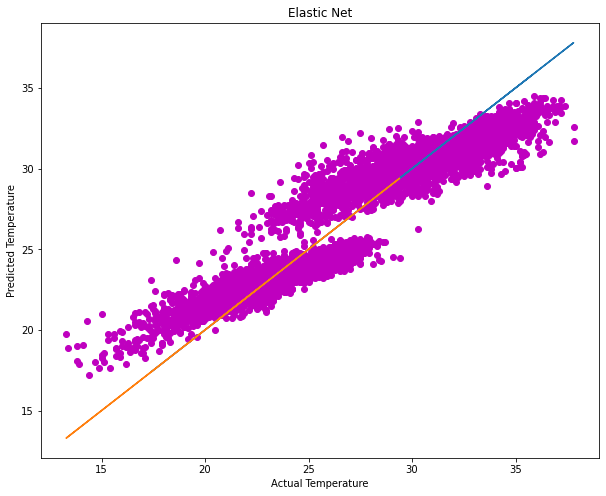

In [124]:
# Elastic nET

plt.figure(figsize=(10,8))
plt.scatter(x=y_test,y=elc_pred,color='m')
plt.plot(y_test,y_test)
plt.xlabel('Actual Temperature')
plt.ylabel('Predicted Temperature')
plt.title("Elastic Net")
plt.show()

Linear and Ridge are identical and Elastic Net's learning is not up to the mark.

Thus we will move ahead with Linear Regression

In [125]:
# Linear Regression
lr=LinearRegression()
lr.fit(x_train,y_train)
lr_pred=lr.predict(x_test)
testing_accu=r2_score(y_test,lr_pred)*100

cv_score=cross_val_score(lr,x,y,cv=5)
cv_mean=cv_score.mean()*100
print(f'The CV score of the model is {cv_mean} and the R2 Score for testing is {testing_accu} ')
print('\n')

print('Mean Squared Error of the model is : ',mean_squared_error(y_test,lr_pred))
print('Mean Absolute Error of the model is : ',mean_absolute_error(y_test,lr_pred))
print('Root Mean Squared Error of the model is : ',np.sqrt(mean_squared_error(y_test,lr_pred)),'\n')

The CV score of the model is 71.1705415499233 and the R2 Score for testing is 80.62684206555221 


Mean Squared Error of the model is :  1.6461413614571274
Mean Absolute Error of the model is :  0.9620169538595823
Root Mean Squared Error of the model is :  1.2830204057056642 



# Saving the Model

In [126]:
import pickle
filename='temperature.pkl'
pickle.dump(lr,open(filename,'wb'))

# Conclusion

In [127]:
# Loading Model

load_model=pickle.load(open('temperature.pkl','rb'))

In [128]:
result=load_model.score(x_test,y_test)
print(result)

0.8062684206555221


In [173]:
conclusion=pd.DataFrame(load_model.predict(x_test),columns=[['Predicted_Tmax','Predicted_Tmin']])
orig=pd.DataFrame(lr_pred,columns=(['Original_Tmax','Original_Tmin']))

In [165]:
final=pd.concat([conclusion,orig],axis=1)

In [166]:
final

(Predicted_Tmax,)  (Predicted_Tmin,)  Original_Tmax  Original_Tmin
0             33.869266          22.993949      33.869266      22.993949
1             26.865405          19.535836      26.865405      19.535836
2             30.627667          25.890101      30.627667      25.890101
3             33.173072          25.478729      33.173072      25.478729
4             31.365643          24.129175      31.365643      24.129175
5             31.988783          26.248142      31.988783      26.248142
6             30.605157          24.724231      30.605157      24.724231
7             29.133715          20.933638      29.133715      20.933638
8             34.210704          25.214080      34.210704      25.214080
9             28.822825          19.814490      28.822825      19.814490
10            29.590919          22.539675      29.590919      22.539675
11            32.702108          26.337166      32.702108      26.337166
12            28.452680          24.177984      28.452680      24.177984
13            31.034410          21.171549      31.034410      21.171549
14            31.097302          23.835007      31.097302      23.835007
15            32.858594          24.549701      32.858594      24.549701
16            36.869823          26.194924      36.869823      26.194924
17            28.752258          23.678438      28.752258      23.678438
18            36.007190          26.867740      36.007190      26.867740
19            29.003376          21.900259      29.003376      21.900259
20            25.134651          21.229884      25.134651      21.229884
21            29.428296          18.022139      29.428296      18.022139
22            30.947278          24.337670      30.947278      24.337670
23            29.097933          24.809718      29.097933      24.809718
24            30.128368          22.383898      30.128368      22.383898
25            29.272254          20.250733      29.272254      20.250733
26            32.919389          24.222219      32.919389      24.222219
27            34.116190          25.598536      34.116190      25.598536
28            27.447766          20.334043      27.447766      20.334043
29            26.799245          19.640386      26.799245      19.640386
30            34.409303          26.773905      34.409303      26.773905
31            28.935841          19.391414      28.935841      19.391414
32            30.285454          23.338314      30.285454      23.338314
33            24.127466          18.811433      24.127466      18.811433
34            26.966097          20.866219      26.966097      20.866219
35            31.396354          25.098355      31.396354      25.098355
36            35.928804          24.019140      35.928804      24.019140
37            25.938386          20.396042      25.938386      20.396042
38            32.064786          23.526151      32.064786      23.526151
39            36.390901          26.773565      36.390901      26.773565
40            26.131667          20.154467      26.131667      20.154467
41            29.654437          23.513253      29.654437      23.513253
42            27.621697          17.179008      27.621697      17.179008
43            28.257089          23.053391      28.257089      23.053391
44            30.695191          19.537746      30.695191      19.537746
45            29.071545          22.797583      29.071545      22.797583
46            28.646587          21.995150      28.646587      21.995150
47            30.483737          23.657281      30.483737      23.657281
48            26.621257          14.992009      26.621257      14.992009
49            32.185507          21.621517      32.185507      21.621517
50            28.393060          19.870730      28.393060      19.870730
51            27.821430          24.673494      27.821430      24.673494
52            24.917668          20.649086      24.917668      20.649086
53            32.045497          24.661907      32.045497      2